In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Import the Data
Telco = pd.read_csv(r'/content/drive/MyDrive/Data Mining/Telco churn_kaggle/Telco-Customer-Churn_2.csv')
num_rows = len(Telco)
print("Number of rows:", num_rows)

Number of rows: 7043


In [6]:
Telco.head()

Customer ID  Gender  Senior Citizen Partner Dependents  Tenure  \
0  7590-VHVEG  Female               0     Yes         No       1   
1  5575-GNVDE    Male               0      No         No      34   
2  3668-QPYBK    Male               0      No         No       2   
3  7795-CFOCW    Male               0      No         No      45   
4  9237-HQITU  Female               0      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

  Monthly Charges  Total Charges  Churn  
0           29.85          29.85     No  
1           56.95        1889.50     No  
2           53.85         108.15    Yes  
3           42.30        1840.75     No  
4           70.70         151.65    Yes  

[5 rows x 21 columns]

Dataset information:

In [7]:
Telco.shape

(7043, 21)

In [8]:
Telco.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [9]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

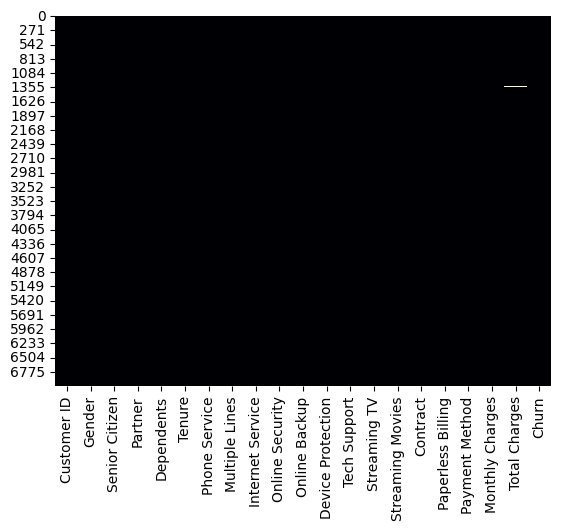

In [10]:
sns.heatmap(Telco.isnull(),cmap = 'magma',cbar = False);

There are some null values in Total charges

In [11]:
Telco['Total Charges'] = pd.to_numeric(Telco['Total Charges'], errors='coerce')
Telco.isnull().sum()

Customer ID           0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

Handling missing values

In [12]:
Telco.loc[Telco ['Total Charges'].isnull() == True]

Customer ID  Gender  Senior Citizen Partner Dependents  Tenure  \
488   4472-LVYGI  Female               0     Yes        Yes       0   
753   3115-CZMZD    Male               0      No        Yes       0   
936   5709-LVOEQ  Female               0     Yes        Yes       0   
1082  4367-NUYAO    Male               0     Yes        Yes       0   
1340  1371-DWPAZ  Female               0     Yes        Yes       0   
3331  7644-OMVMY    Male               0     Yes        Yes       0   
3826  3213-VVOLG    Male               0     Yes        Yes       0   
4380  2520-SGTTA  Female               0     Yes        Yes       0   
5218  2923-ARZLG    Male               0     Yes        Yes       0   
6670  4075-WKNIU  Female               0     Yes        Yes       0   
6754  2775-SEFEE    Male               0      No        Yes       0   

     Phone Service    Multiple Lines Internet Service      Online Security  \
488             No  No phone service              DSL                  Yes   
753            Yes                No               No  No internet service   
936            Yes                No              DSL                  Yes   
1082           Yes               Yes               No  No internet service   
1340            No  No phone service              DSL                  Yes   
3331           Yes                No               No  No internet service   
3826           Yes               Yes               No  No internet service   
4380           Yes                No               No  No internet service   
5218           Yes                No               No  No internet service   
6670           Yes               Yes              DSL                   No   
6754           Yes               Yes              DSL                  Yes   

      ...    Device Protection         Tech Support         Streaming TV  \
488   ...                  Yes                  Yes                  Yes   
753   ...  No internet service  No internet service  No internet service   
936   ...                  Yes                   No                  Yes   
1082  ...  No internet service  No internet service  No internet service   
1340  ...                  Yes                  Yes                  Yes   
3331  ...  No internet service  No internet service  No internet service   
3826  ...  No internet service  No internet service  No internet service   
4380  ...  No internet service  No internet service  No internet service   
5218  ...  No internet service  No internet service  No internet service   
6670  ...                  Yes                  Yes                  Yes   
6754  ...                   No                  Yes                   No   

         Streaming Movies  Contract Paperless Billing  \
488                    No  Two year               Yes   
753   No internet service  Two year                No   
936                   Yes  Two year                No   
1082  No internet service  Two year                No   
1340                   No  Two year                No   
3331  No internet service  Two year                No   
3826  No internet service  Two year                No   
4380  No internet service  Two year                No   
5218  No internet service  One year               Yes   
6670                   No  Two year                No   
6754                   No  Two year               Yes   

                 Payment Method Monthly Charges  Total Charges  Churn  
488   Bank transfer (automatic)           52.55            NaN     No  
753                Mailed check           20.25            NaN     No  
936                Mailed check           80.85            NaN     No  
1082               Mailed check           25.75            NaN     No  
1340    Credit card (automatic)           56.05            NaN     No  
3331               Mailed check           19.85            NaN     No  
3826               Mailed check           25.35            NaN     No  
4380               Mailed check          

As the missing values are less as compared to the entire datset so we can ignore those and drop those rows

In [13]:
#Removing missing values
Telco.dropna(how = 'any', inplace = True)

Just re-checking the null values (drop)

In [14]:
Telco.loc[Telco ['Total Charges'].isnull() == True]
#Telco.fillna(0)

Empty DataFrame
Columns: [Customer ID, Gender, Senior Citizen, Partner, Dependents, Tenure, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Churn]
Index: []

[0 rows x 21 columns]

In [15]:
Telco['Total Charges'] = pd.to_numeric(Telco['Total Charges'], errors='coerce')
Telco.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

No null values present in the data!

In [16]:
Telco.describe().T

count    mean     std   min    25%     50%     75%     max
Senior Citizen  7032.00    0.16    0.37  0.00   0.00    0.00    0.00    1.00
Tenure          7032.00   32.42   24.55  1.00   9.00   29.00   55.00   72.00
Monthly Charges 7032.00   64.80   30.09 18.25  35.59   70.35   89.86  118.75
Total Charges   7032.00 2283.30 2266.77 18.80 401.45 1397.47 3794.74 8684.80

Removing the unwanted coloumns

In [17]:
#drop column customerID and tenure
Telco.drop(columns= ['Customer ID'], axis=1, inplace=True)
Telco.head()

Gender  Senior Citizen Partner Dependents  Tenure Phone Service  \
0  Female               0     Yes         No       1            No   
1    Male               0      No         No      34           Yes   
2    Male               0      No         No       2           Yes   
3    Male               0      No         No      45            No   
4  Female               0      No         No       2           Yes   

     Multiple Lines Internet Service Online Security Online Backup  \
0  No phone service              DSL              No           Yes   
1                No              DSL             Yes            No   
2                No              DSL             Yes           Yes   
3  No phone service              DSL             Yes            No   
4                No      Fiber optic              No            No   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

   Monthly Charges  Total Charges Churn  
0            29.85          29.85    No  
1            56.95        1889.50    No  
2            53.85         108.15   Yes  
3            42.30        1840.75    No  
4            70.70         151.65   Yes

The dataset has too many features with text data and are probably categorical features!


Let's divide the features into numerical and categorical features.
We will also execute the label encoding transformation for categorical features.



In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Telco1 = Telco.copy(deep = True)
text_data_features = [i for i in list(Telco.columns) if i not in list(Telco.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    Telco1[i] = le.fit_transform(Telco1[i])
    print(i,' : ',Telco1[i].unique(),' = ',le.inverse_transform(Telco1[i].unique()))

Label Encoder Transformation
Gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [0 1]  =  ['No' 'Yes']
Multiple Lines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [19]:
Telco1

Gender  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
0          0               0        1           0       1              0   
1          1               0        0           0      34              1   
2          1               0        0           0       2              1   
3          1               0        0           0      45              0   
4          0               0        0           0       2              1   
...      ...             ...      ...         ...     ...            ...   
7038       1               0        1           1      24              1   
7039       0               0        1           1      72              1   
7040       0               0        1           1      11              0   
7041       1               1        1           0       4              1   
7042       1               0        0           0      66              1   

      Multiple Lines  Internet Service  Online Security  Online Backup  \
0                  1                 0                0              2   
1                  0                 0                2              0   
2                  0                 0                2              2   
3                  1                 0                2              0   
4                  0                 1                0              0   
...              ...               ...              ...            ...   
7038               2                 0                2              0   
7039               2                 1                0              2   
7040               1                 0                2              0   
7041               2                 1                0              0   
7042               0                 1                2              0   

      Device Protection  Tech Support  Streaming TV  Streaming Movies  \
0                     0             0             0                 0   
1                     2             0             0                 0   
2                     0             0             0                 0   
3                     2             2             0                 0   
4                     0             0             0                 0   
...                 ...           ...           ...               ...   
7038                  2             2             2                 2   
7039                  2             0             2                 2   
7040                  0             0             0                 0   
7041                  0             0             0                 0   
7042                  2             2             2                 2   

      Contract  Paperless Billing  Payment Method  Monthly Charges  \
0            0                  1               2            29.85   
1            1                  0               3            56.95   
2            0                  1               3            53.85   
3            1                  0               0            42.30   
4            0                  1               2            70.70   
...        ...                ...             ...              ...   
7038         1                  1               3            84.80   
7039         1                  1               1           103.20   
7040         0                  1               2            29.60   
7041         0                  1               3            74.40   
7042         2                  1               0           105.65   

      Total Charges  Churn  
0             29.85      0  
1           1889.50      0  
2            108.15      1  
3           1840.75      0  
4            151.65      1  
...             ...    ...  
7038        1990.50      0  
7039        7362.90      0  
7040         346.45      0  
7041         306.60      1  
7042        6844.50      0  

[7032 rows x 20 columns]



* We creating a deep copy of the orginal dataset and label encoding the text data.
*   Modifications in the original dataset will not be highlighted in this deep copy.
*   Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
*   We now again the descriptive stats of the data.








In [20]:
Telco1.describe()

Gender  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
count 7032.00         7032.00  7032.00     7032.00 7032.00        7032.00   
mean     0.50            0.16     0.48        0.30   32.42           0.90   
std      0.50            0.37     0.50        0.46   24.55           0.30   
min      0.00            0.00     0.00        0.00    1.00           0.00   
25%      0.00            0.00     0.00        0.00    9.00           1.00   
50%      1.00            0.00     0.00        0.00   29.00           1.00   
75%      1.00            0.00     1.00        1.00   55.00           1.00   
max      1.00            1.00     1.00        1.00   72.00           1.00   

       Multiple Lines  Internet Service  Online Security  Online Backup  \
count         7032.00           7032.00          7032.00        7032.00   
mean             0.94              0.87             0.79           0.91   
std              0.95              0.74             0.86           0.88   
min              0.00              0.00             0.00           0.00   
25%              0.00              0.00             0.00           0.00   
50%              1.00              1.00             1.00           1.00   
75%              2.00              1.00             2.00           2.00   
max              2.00              2.00             2.00           2.00   

       Device Protection  Tech Support  Streaming TV  Streaming Movies  \
count            7032.00       7032.00       7032.00           7032.00   
mean                0.90          0.80          0.98              0.99   
std                 0.88          0.86          0.89              0.89   
min                 0.00          0.00          0.00              0.00   
25%                 0.00          0.00          0.00              0.00   
50%                 1.00          1.00          1.00              1.00   
75%                 2.00          2.00          2.00              2.00   
max                 2.00          2.00          2.00              2.00   

       Contract  Paperless Billing  Payment Method  Monthly Charges  \
count   7032.00            7032.00         7032.00          7032.00   
mean       0.69               0.59            1.57            64.80   
std        0.83               0.49            1.07            30.09   
min        0.00               0.00            0.00            18.25   
25%        0.00               0.00            1.00            35.59   
50%        0.00               1.00            2.00            70.35   
75%        1.00               1.00            2.00            89.86   
max        2.00               1.00            3.00           118.75   

       Total Charges   Churn  
count        7032.00 7032.00  
mean         2283.30    0.27  
std          2266.77    0.44  
min            18.80    0.00  
25%           401.45    0.00  
50%          1397.47    0.00  
75%          3794.74    1.00  
max          8684.80    1.00

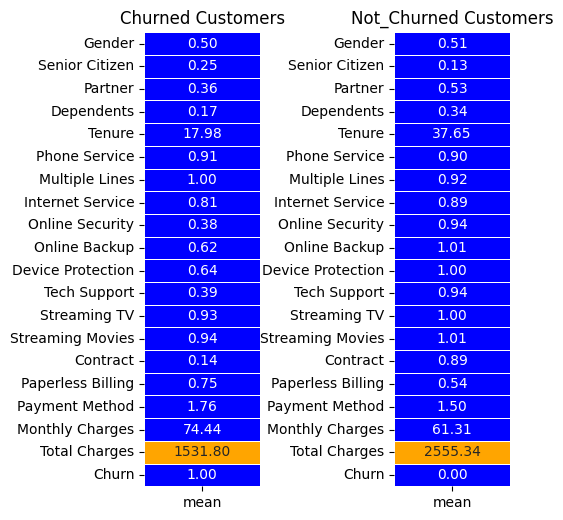

In [21]:
colors = ['#0000FF','#FFA500']

churn = Telco1[Telco1['Churn'] == 1].describe().T
not_churn = Telco1[Telco1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)



*   Mean values of all the features for churned and not-churned customers.
*   Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.


*   Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
*   Churned customer's Contract value is much smaller than those of not-churned customers.


*   Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
*   Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.

*   From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
*   The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

# Exploratory Data Analysis

Dividing features into Numerical and Categorical :

In [22]:
col = list(Telco1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(Telco[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender Senior Citizen Partner Dependents Phone Service Multiple Lines Internet Service Online Security Online Backup Device Protection Tech Support Streaming TV Streaming Movies Contract Paperless Billing Payment Method Churn
Numerical Features : Tenure Monthly Charges Total Charges


Target Variable Visualization (Churn)

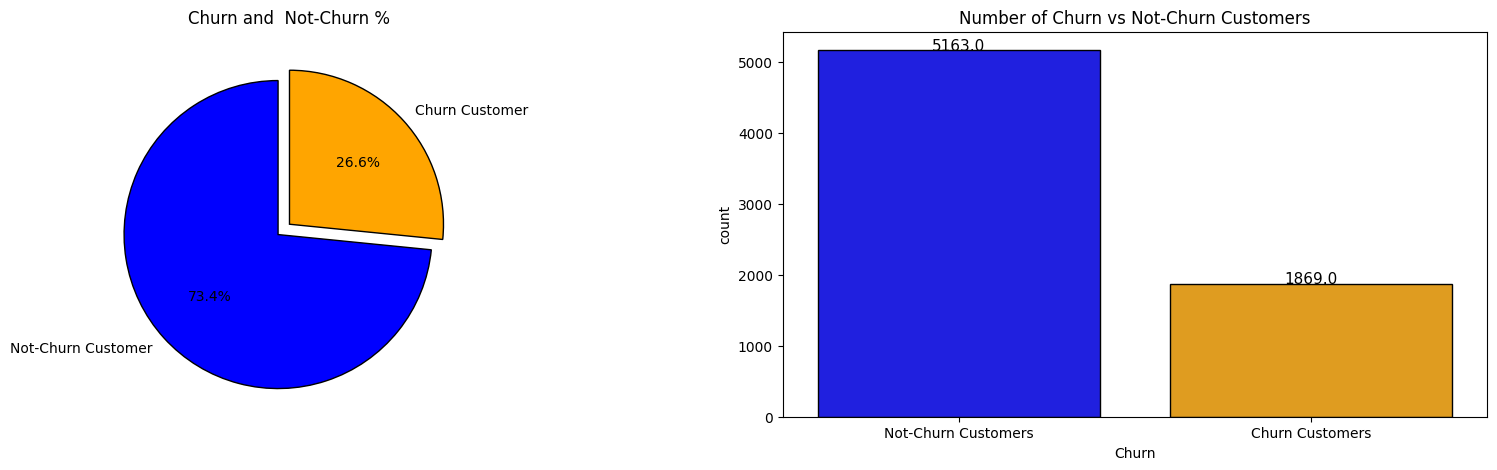

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined 'colors' variable and 'Telco1' DataFrame

l = list(Telco1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Churn and  Not-Churn %')

plt.subplot(1,2,2)
ax = sns.countplot(x='Churn', data=Telco, palette = colors,edgecolor='black')  # Specify 'x' explicitly to avoid ambiguity
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

plt.title('Number of Churn vs Not-Churn Customers')
plt.show()




*   The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
*   Due to this, predictions will be biased towards Not-Churn customers.

*   Visualizations will also display this bias!







Categorical Features vs Target Variable (Churn):

In [24]:
categorical_features.remove('Churn')

We will remove Churn, target variable, from the categorical features list for visualization purposes

In [25]:
l1 = ['Gender','Senior Citizen','Partner','Dependents'] # Customer Information
l2 = ['Phone Service','Multiple Lines','Internet Service','Streaming TV','Streaming Movies',
      'Online Security','Online Backup','Device Protection','Tech Support'] # Services Signed Up for!
l3 = ['Contract','Paperless Billing','Payment Method'] # Payment Information

We have too many categorical features in this dataset!
We divide them into 3 groups depending on their values or based on the column name!

# **Univariate Analysis**

## Group 1 : Customer Information :
Gender | Senior Citizen | Partner | Dependents |

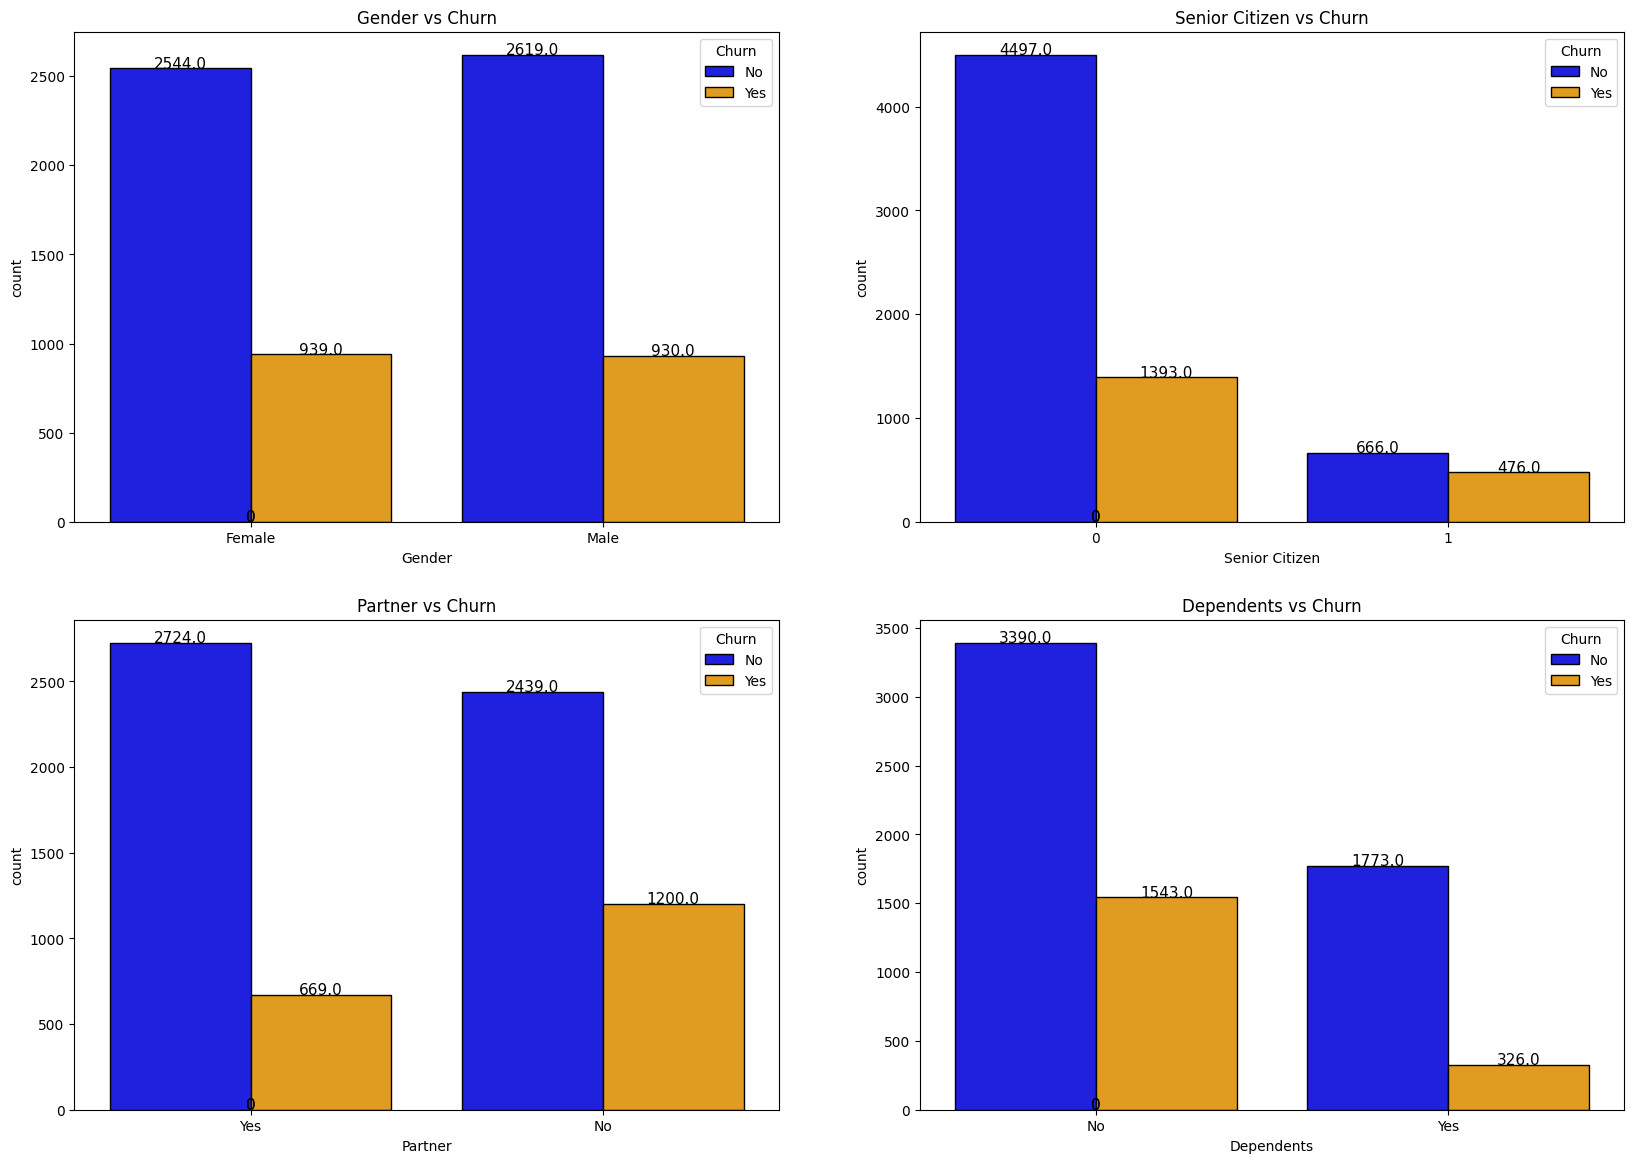

In [26]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x =l1[i],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);




*   Customer churning for male & female customers is very similar to each other!
*   Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
*   Customers who are housing with a Partner churned less as compared to those not living with a Partner.
*   Similary, churning is high for the customers that don't have Dependents with them!

## Group 2: Services Subscribed by the Customer :

For visualization purposes, we will create 2 groups!

Phone Service | Multiple Lines | Internet Service | Streaming TV | Streaming Movies |

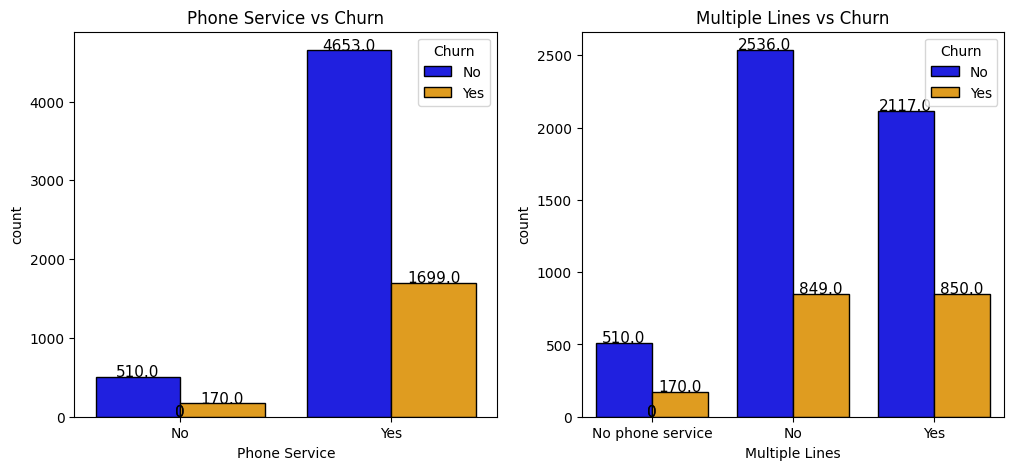

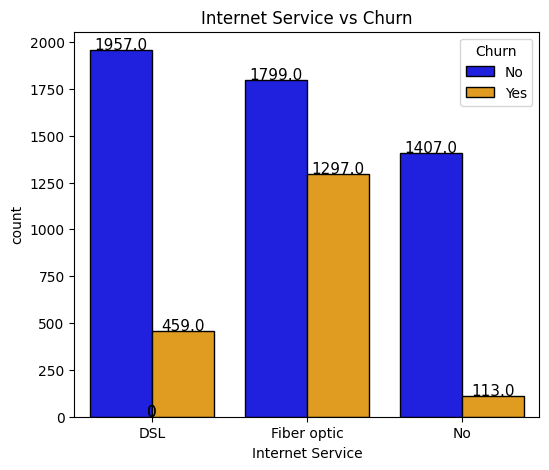

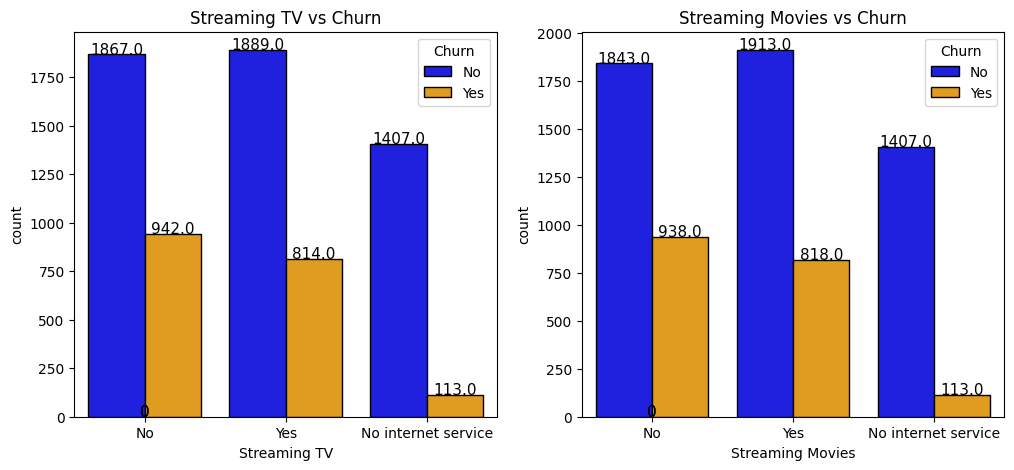

In [27]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x = l2[i],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x = l2[2],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x =l2[i + 3],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);




*   For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
*   In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.


*   A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
*   Streaming TV and StreamingMovies display an identical graph. Irrespective of being subscribed to Streaming TV & Streaming Movies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

## Group 2: Services Subscribed by the Customer :

Online Security | Online Backup | Device Protection | Tech Support |

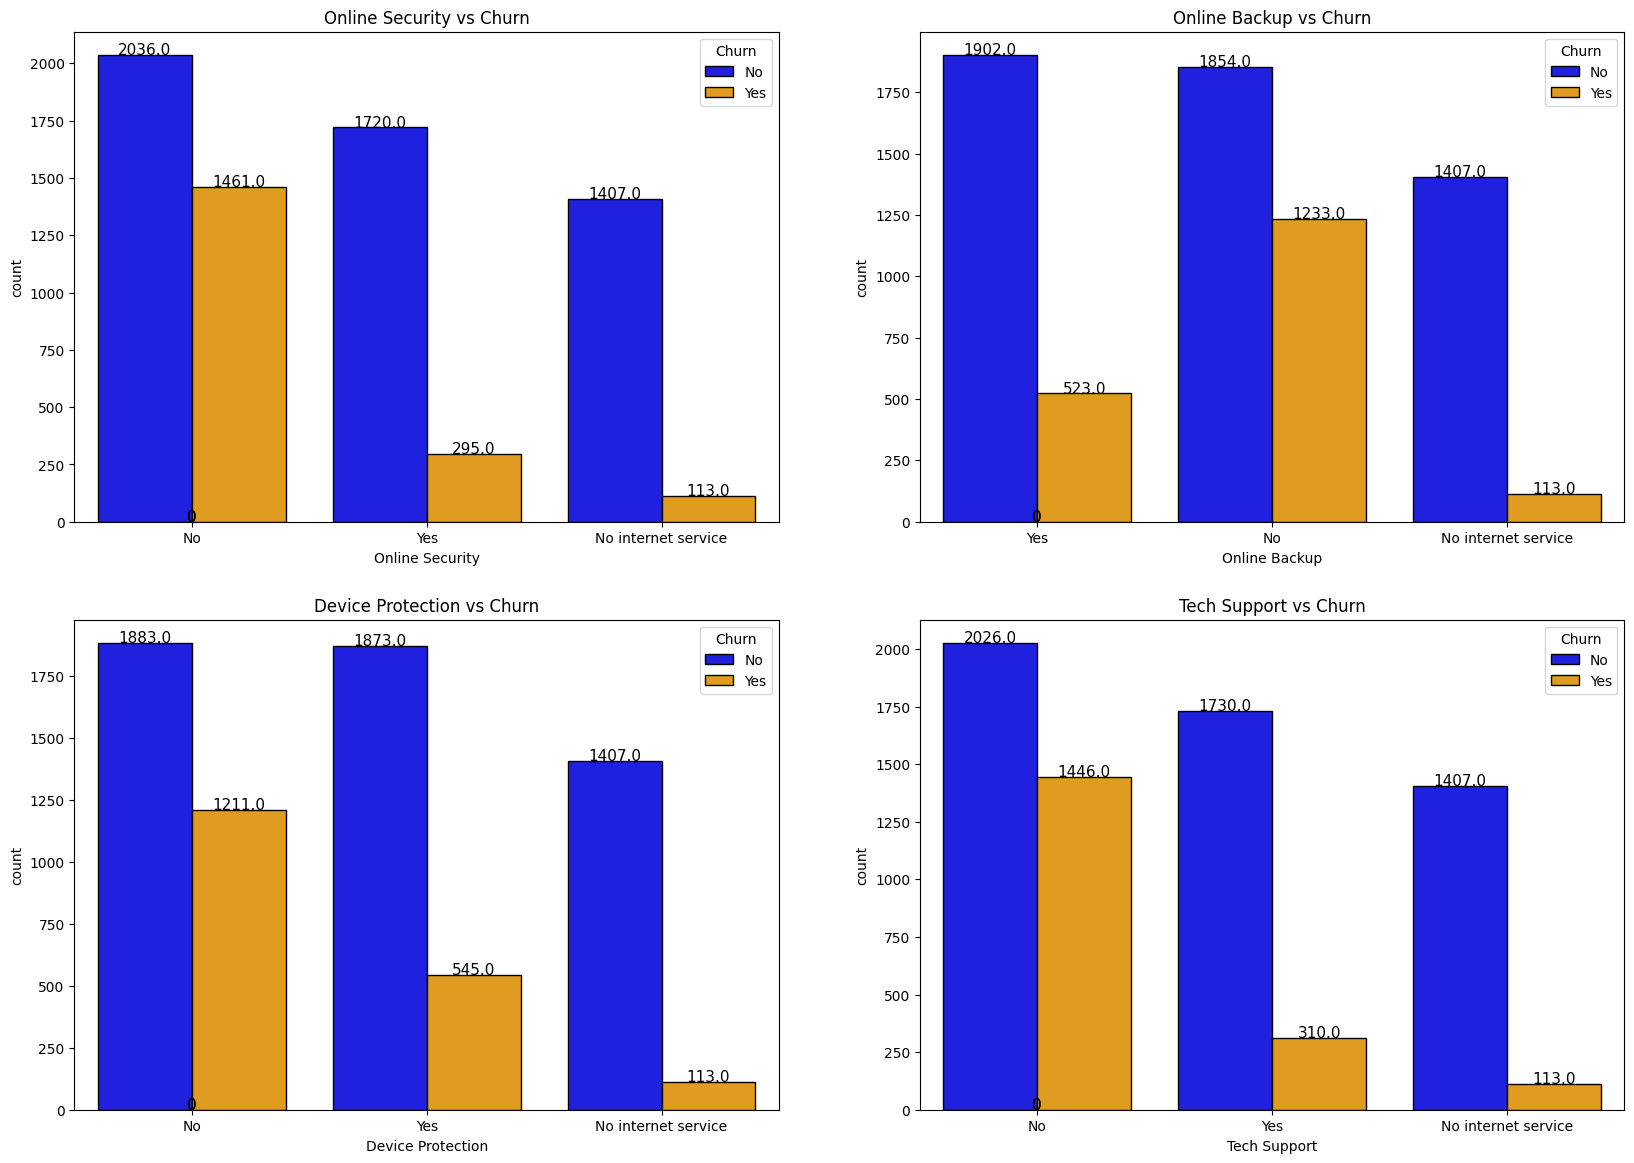

In [28]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x = l2[-4 + i],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);



*   When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!
*   A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

## Group 3 : Contract and Payment Information

Contract | Paperless Billing | Payment Method |

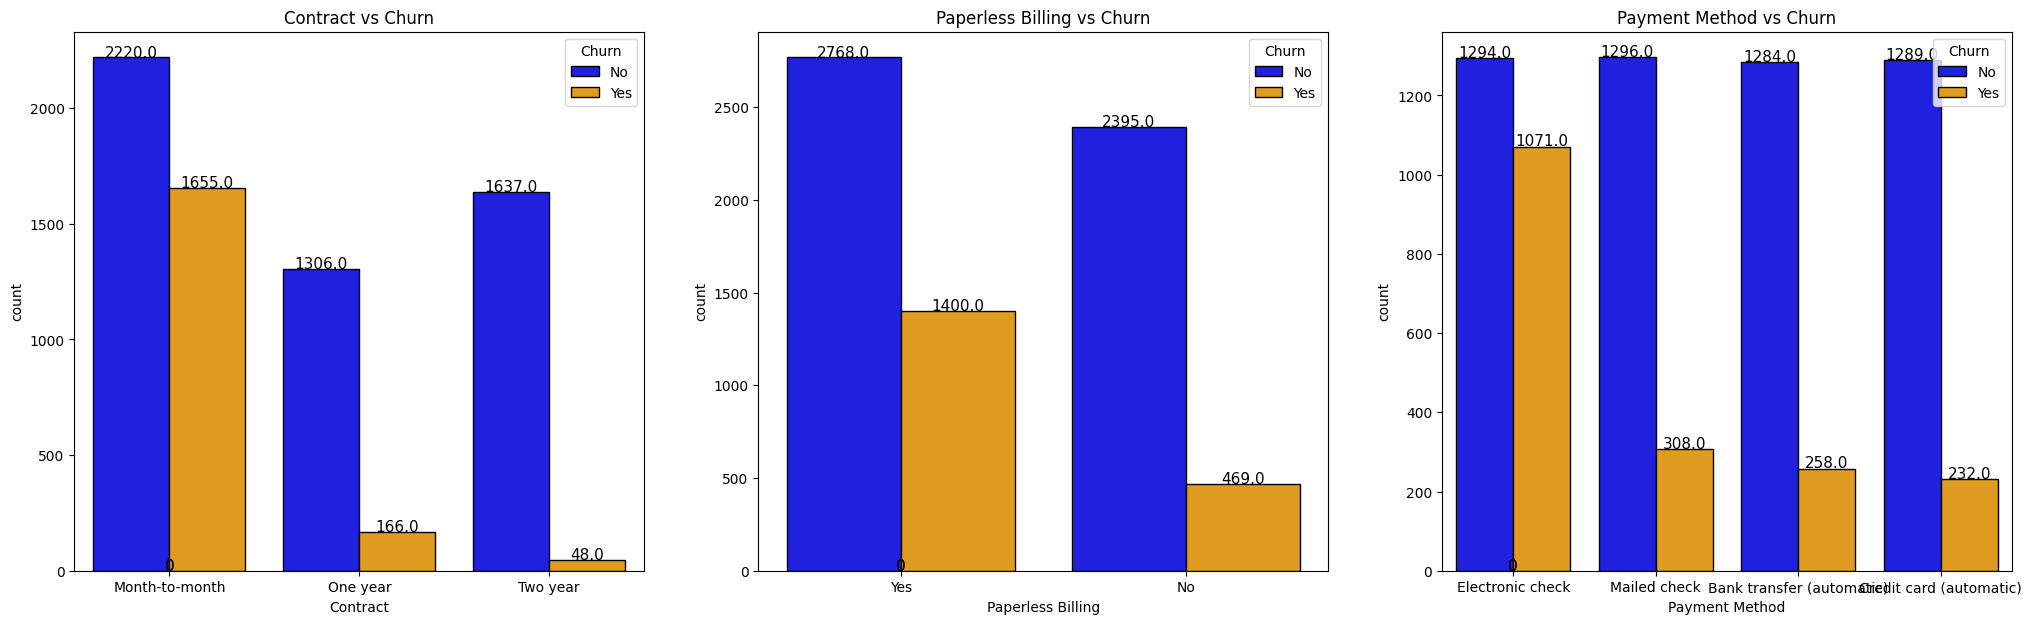

In [29]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x = l3[0],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x =l3[1],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x =l3[2],data = Telco,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);



*   Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
*   Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!


*   PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
*  Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

## Categorical Features vs Positive Target Variable (Churn Cases)

We will now point our attention directly towards to the churn customers!

### Group 1 : Customer Information :

Gender | Senior Citizen | Partner | Dependents |

In [30]:
Gender = Telco1[Telco1['Churn'] == 1]['Gender'].value_counts()
Gender = [Gender[0] / sum(Gender) * 100, Gender[1] / sum(Gender) * 100] # Female / Male

seniorcitizen = Telco1[Telco1['Churn'] == 1]['Senior Citizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = Telco1[Telco1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = Telco1[Telco1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

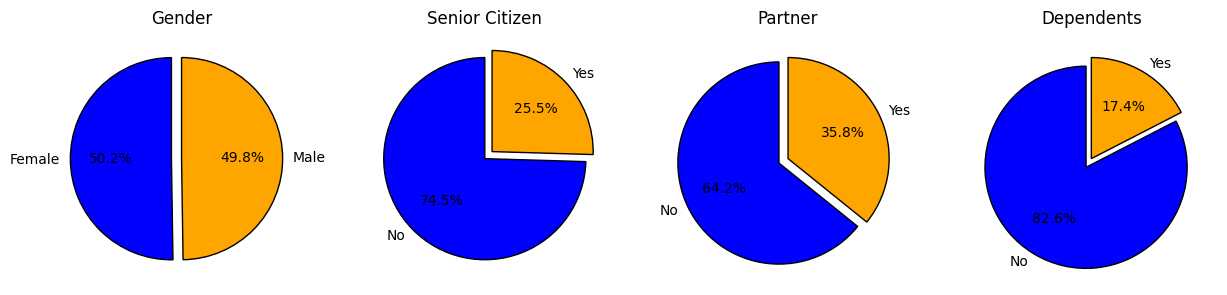

In [31]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(Gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Senior Citizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');



*   We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!
*   75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!
*   Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.

### Group 2: Services Subscribed by the Customer :

Phone Service | Multiple Lines | Internet Service | Streaming TV | Streaming Movies |

In [32]:
phoneservice = Telco1[Telco1['Churn'] == 1]['Phone Service'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = Telco1[Telco1['Churn'] == 1]['Multiple Lines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes

internetservice = Telco1[Telco1['Churn'] == 1]['Internet Service'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No

streamingtv = Telco1[Telco1['Churn'] == 1]['Streaming TV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes

streamingmovies = Telco1[Telco1['Churn'] == 1]['Streaming Movies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

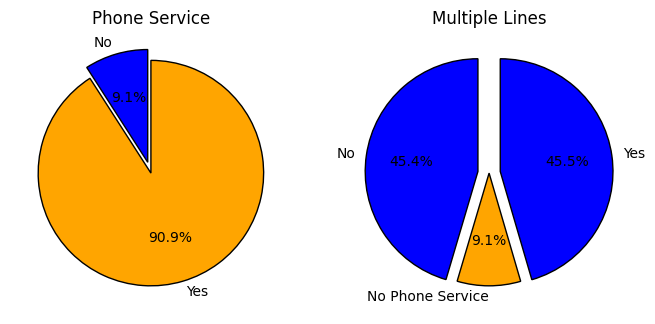

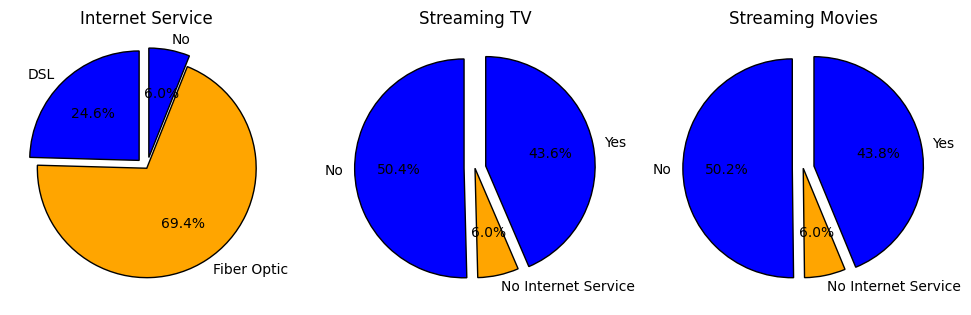

In [33]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone Service');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Multiple Lines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Internet Service');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming TV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming Movies');



*   Despite providing PhoneService, a high percentage of customers have switched!
*   Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
*   Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!
*   For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

### Group 2: Services Subscribed by the Customer :

Online Security | Online Backup | Device Protection | Tech Support |

In [34]:
onlinesecurity = Telco1[Telco1['Churn'] == 1]['Online Security'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes

onlinebackup = Telco1[Telco1['Churn'] == 1]['Online Backup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes

deviceprotection = Telco1[Telco1['Churn'] == 1]['Device Protection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes

techsupport = Telco1[Telco1['Churn'] == 1]['Tech Support'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes

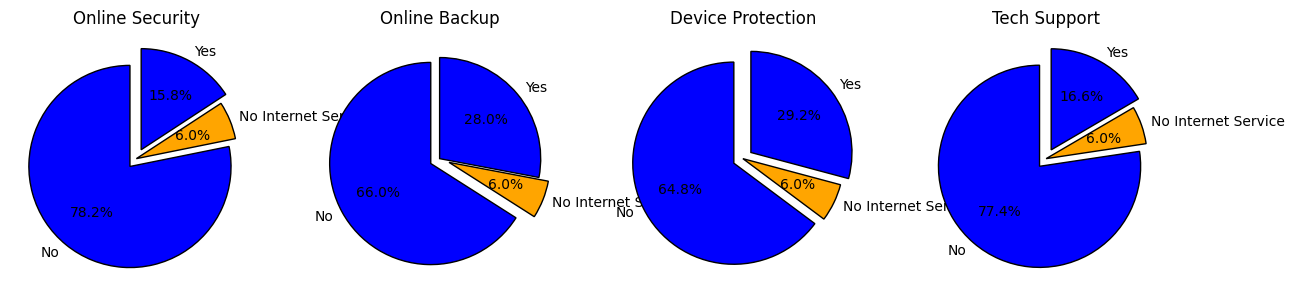

In [35]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Online Security');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Online Backup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Device Protection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Tech Support');


*   Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features!




### Group 3 :

 Contract | PaperlessBilling | Payment Method |

In [36]:
contract = Telco1[Telco1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = Telco1[Telco1['Churn'] == 1]['Paperless Billing'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes

paymentmethod = Telco1[Telco1['Churn'] == 1]['Payment Method'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100,
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100]
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

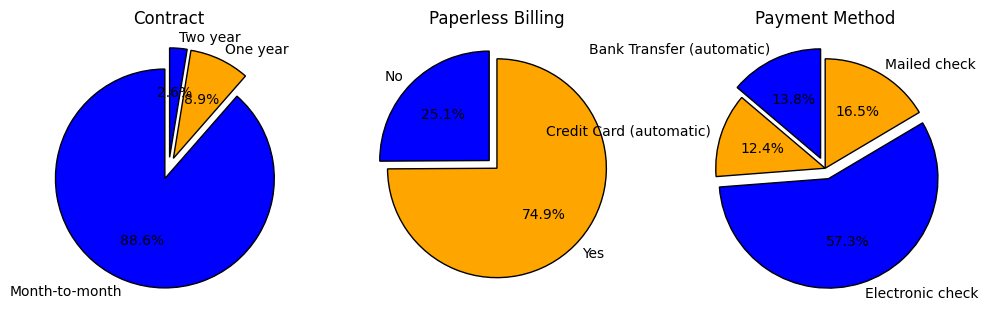

In [37]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless Billing');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment Method');



*   Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers!
*   PaperlessBilling does not seemed to be appreciated by the customers!
*   Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!

# Numerical Features :

Distribution of Numerical Features :

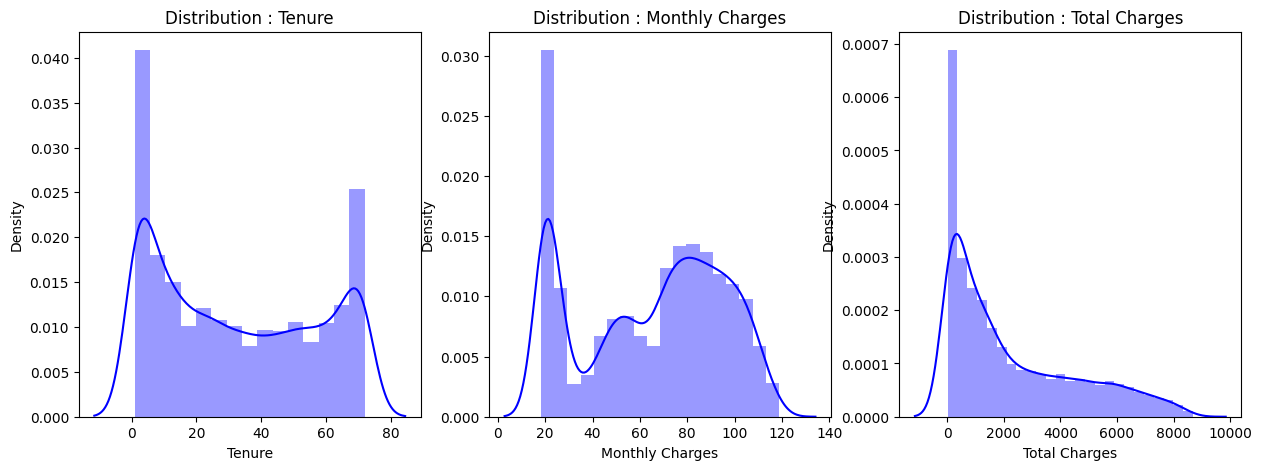

In [38]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(Telco1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()



*   Tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
*  TotalCharges displays a positively or rightly skewed distribution


## Numerical Features w.r.t Target Variable (Outcome) :

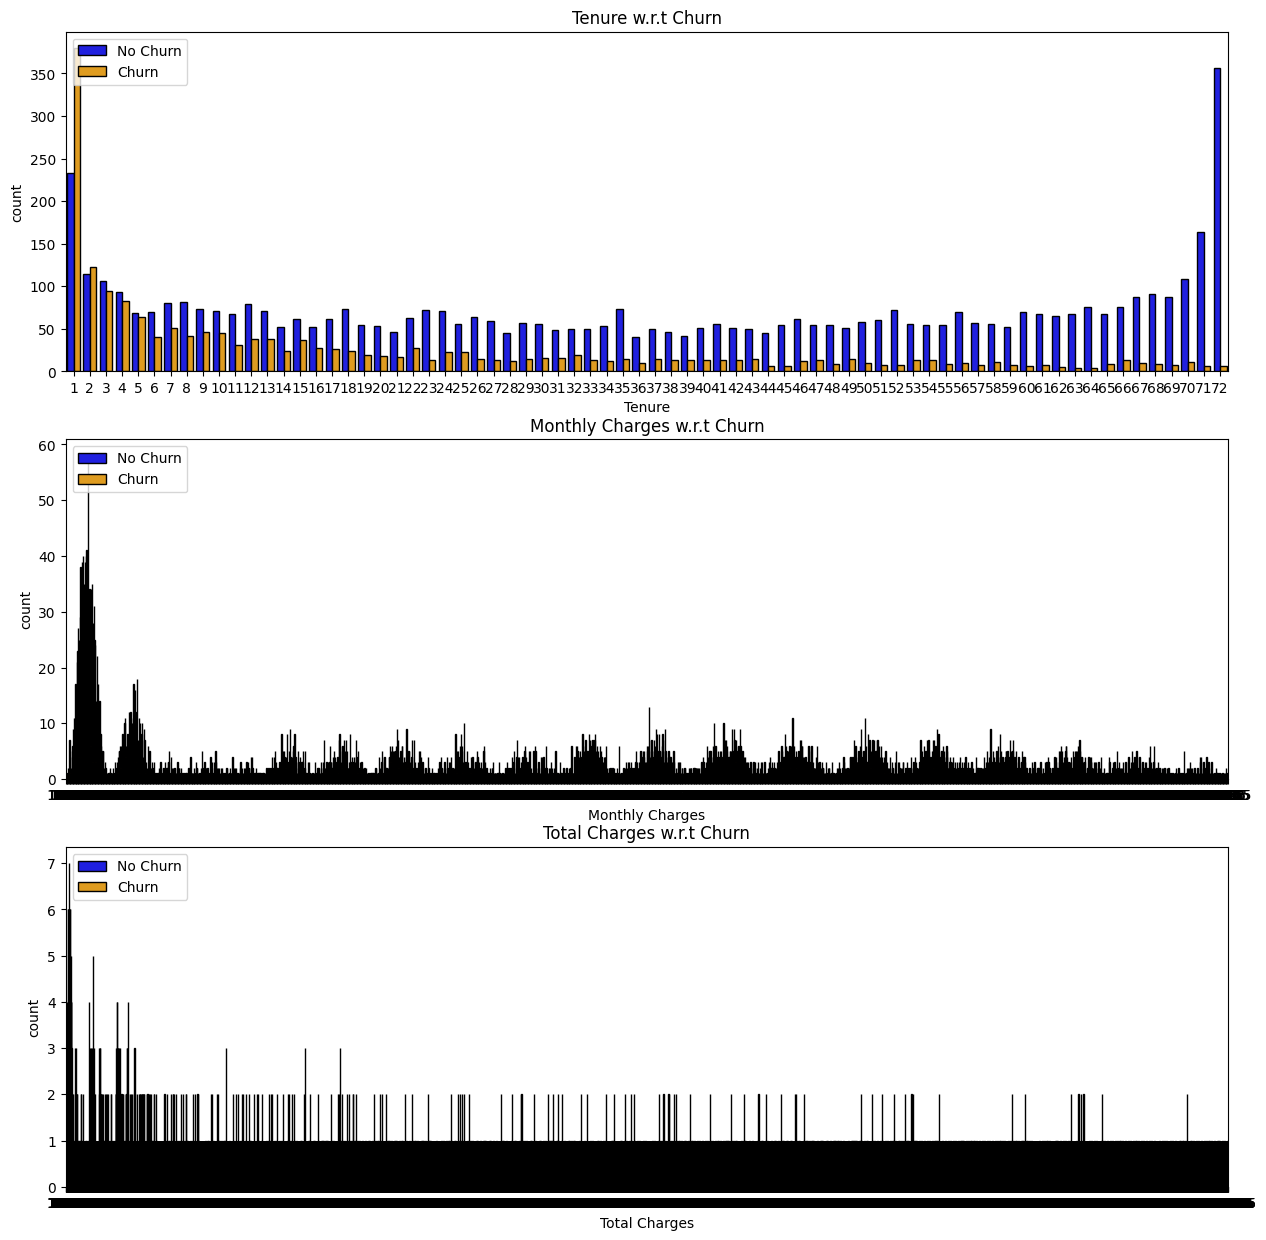

In [39]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(x = numerical_features[i],data = Telco1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.title(title);



*   Considering tenure, a high number of customers have left after the 1st month. This high cancellation of services continues for 4 - 5 months but the churn customers have reduced since the 1st month. As the tenure increases, customers dropping out decreases.
*   This results in low customer churning as the tenure increases. It displays a symmetrical graph with the left side dominating with churn numbers and right side dominating with low churn numbers.
*   Because of too many unique data points in MonthlyCharges & TotalCharges, it is difficult to gain any type of insight. Thus, we will scale these numerical features for understandable visualization and gaining insights purposes. This brings the varied data points to a constant value that represents a range of values.
*   Here, we divide the data points of the numerical features by 5 or 500 and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.

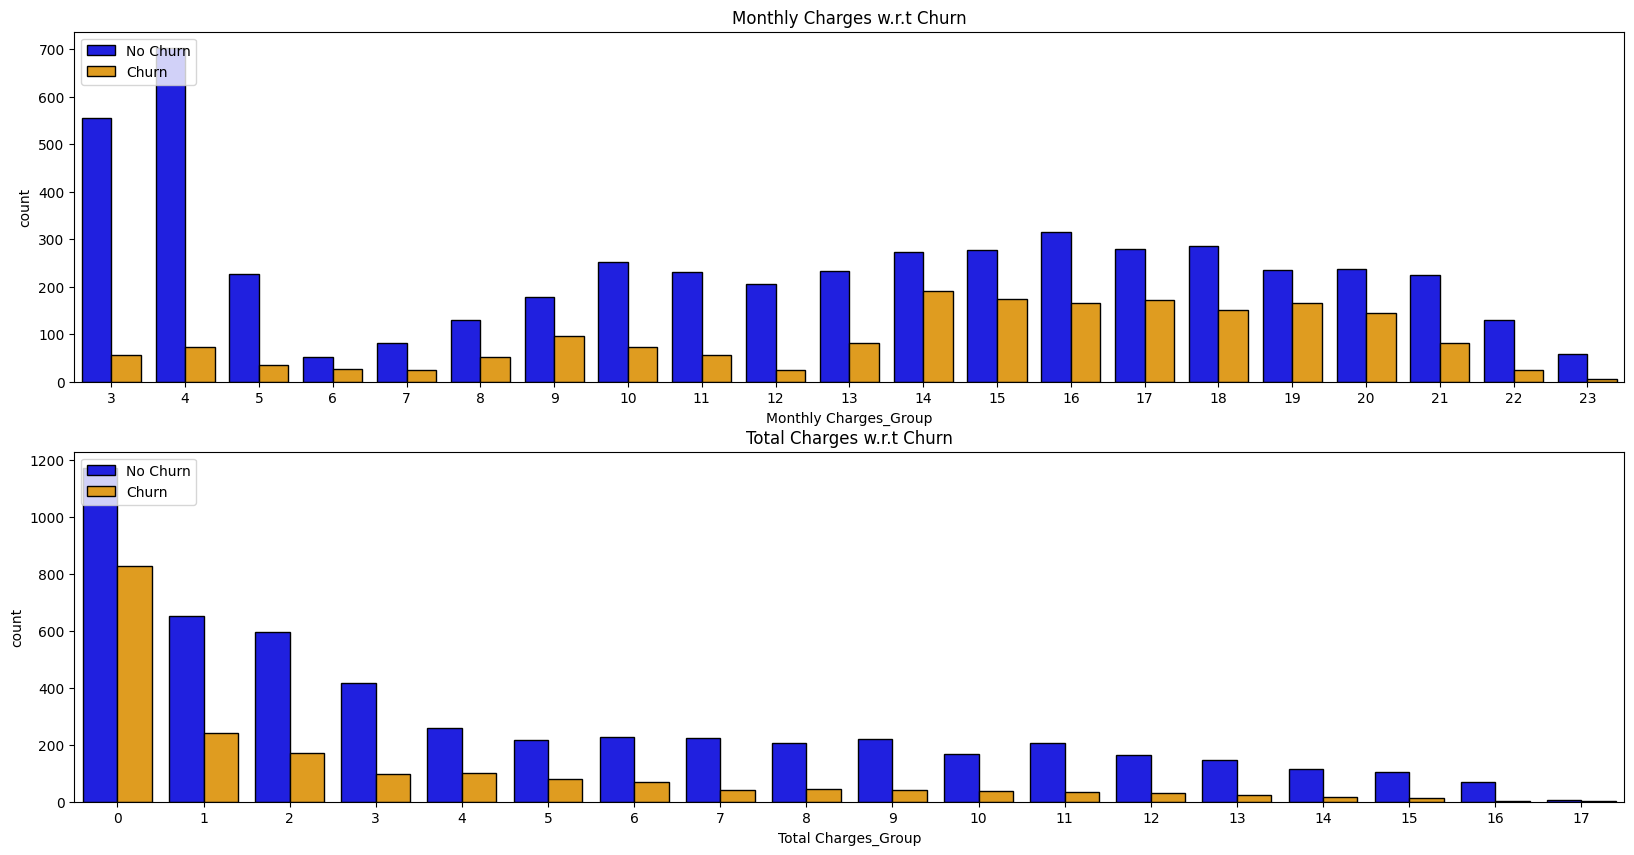

In [54]:
Telco1['Monthly Charges_Group'] = [int(i / 5) for i in Telco1['Monthly Charges']]
Telco1['Total Charges_Group'] = [int(i / 500) for i in Telco1['Total Charges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(x = numerical_features[1 + i]+'_Group',data = Telco1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title);



*   For MonthlyCharges group, churn rate is high for the values between 65 (13x5) - 105 (21x5). This MonthlyCharges range of values caused the customers to switch.
*   A very high number of customers opted out of the services for the TotalCharges below 500. This customer churning continues for a TotalCharges range of values from 0 (0x500) - 1000 (2x500).




# **Bivariate Analysis**

## Numerical features vs Categorical features w.r.t Target variable (Churn) :



### Tenure vs Categorical Features :

Tenure vs Group 1 : Customer Information : Gender | Senior Citizen | Partner | Dependents |

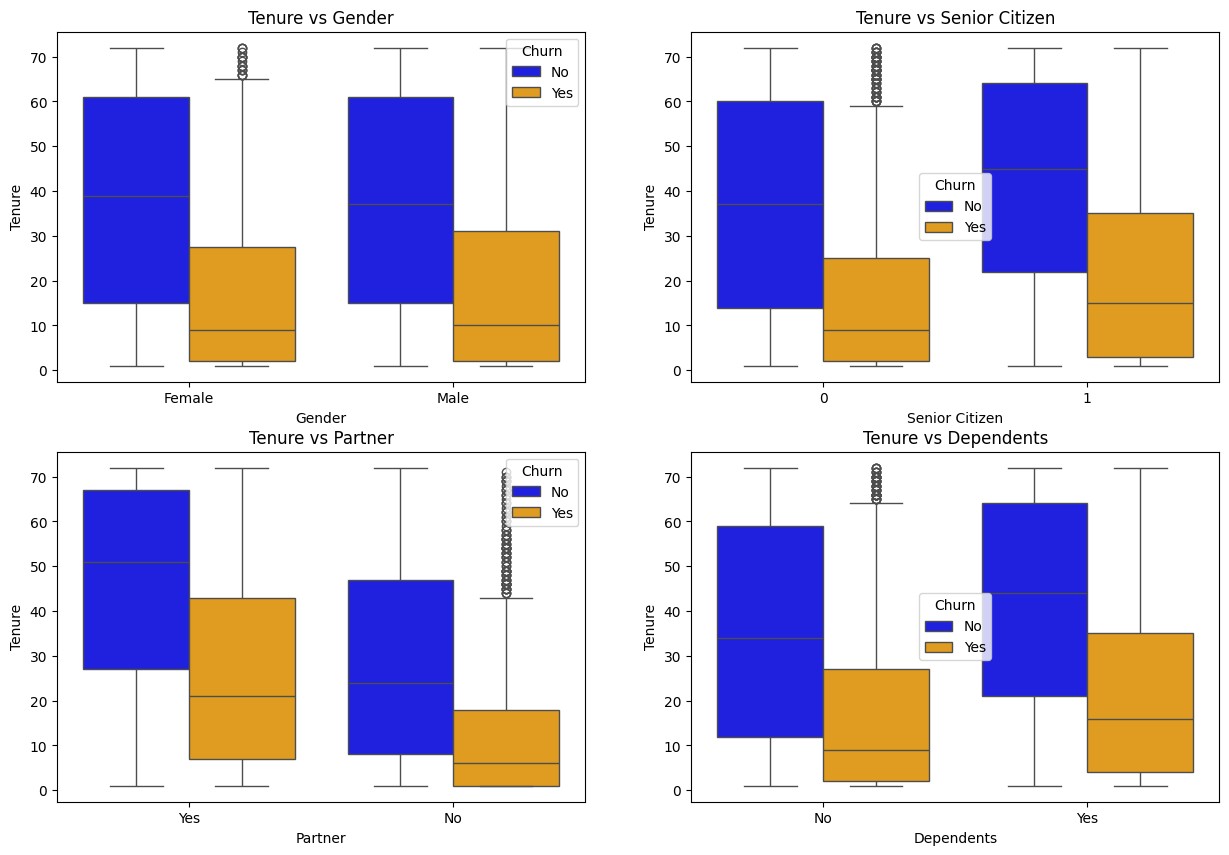

In [55]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Tenure',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Tenure vs ' + l1[i]);



*   Male & Female customer churn graphs are very similar.
SeniorCitizen opted out from the services for a tenure values of 0 - 35 months. 20 - 35 months is the kind of decision making period about whether to continue or swtich for SeniorCitizen.

*  Similarly, customers with partners continued with the service for a tenure of 5 - 45 months.



### Tenure vs Group 2:

Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

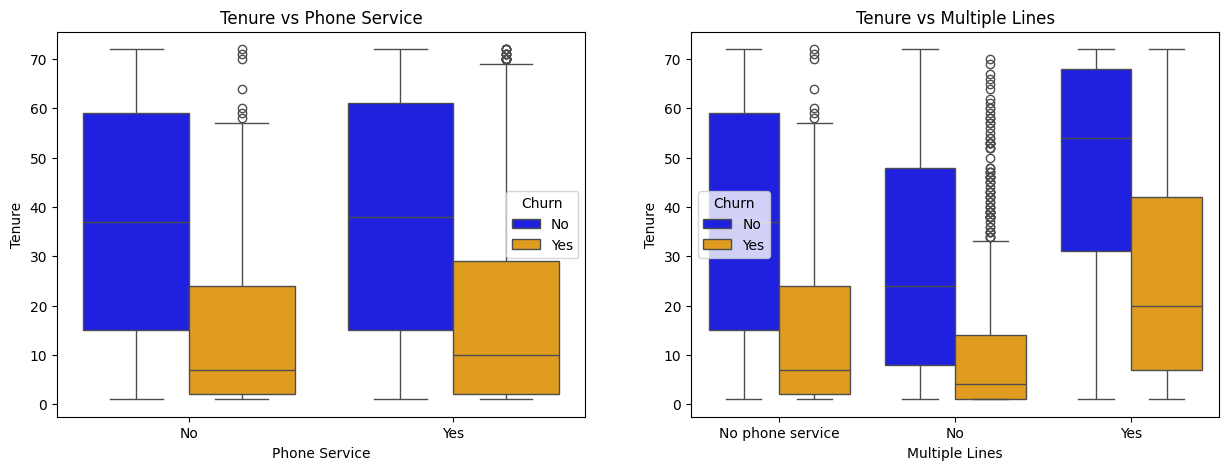

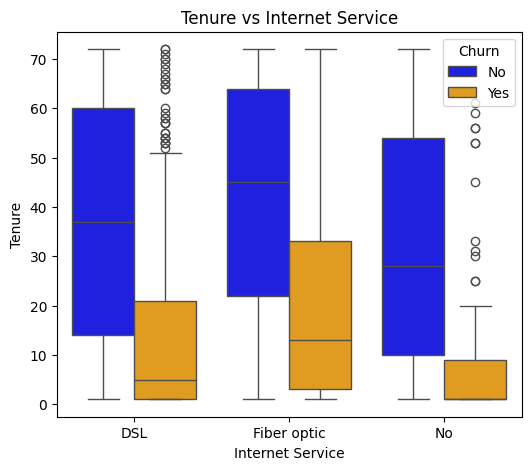

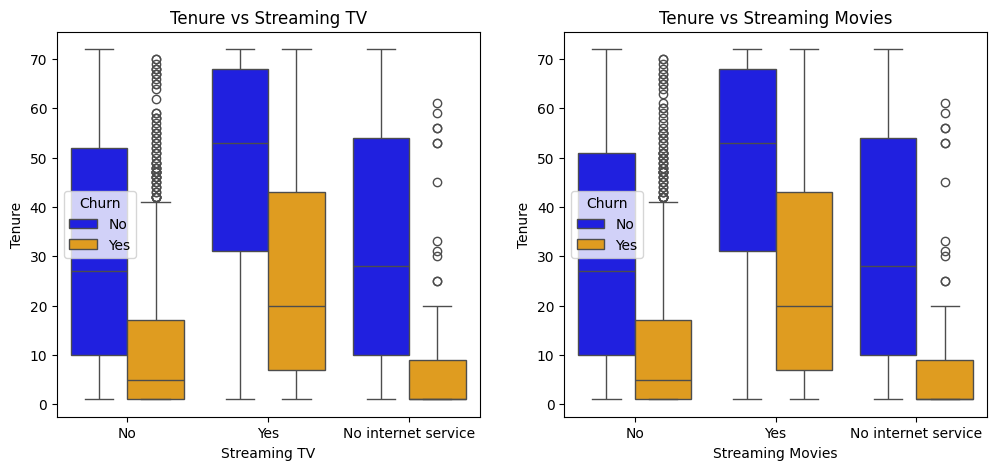

In [56]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Tenure',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Tenure',data = Telco,hue = 'Churn',palette = colors);
plt.title('Tenure vs ' + l2[2]);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Tenure',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Tenure vs ' + l2[i + 3]);



*   Presence of MutipleLines pushes the median MonthlyCharges irrespective if the customers opt out of the services or not.

*   For the graph of tenure vs PhoneService, availability of PhoneService or not display a mirroring visuals. Customers were probably not heavy phone (call - message) users.
*   For InternetService, customers seem to be very skeptical about the usage of Optic Fibre cables as the churning lasted for about 30 - 35 months before either carrying it forward or switching to a new one!
*  Similary for StreamingTV & StreamingMovies, a churn tenure period of about 10 - 40 months can be observed!






### Tenure vs Group 2:

Services Subscribed by the Customer : Online Security | Online Backup | Device Protection | Tech Support |

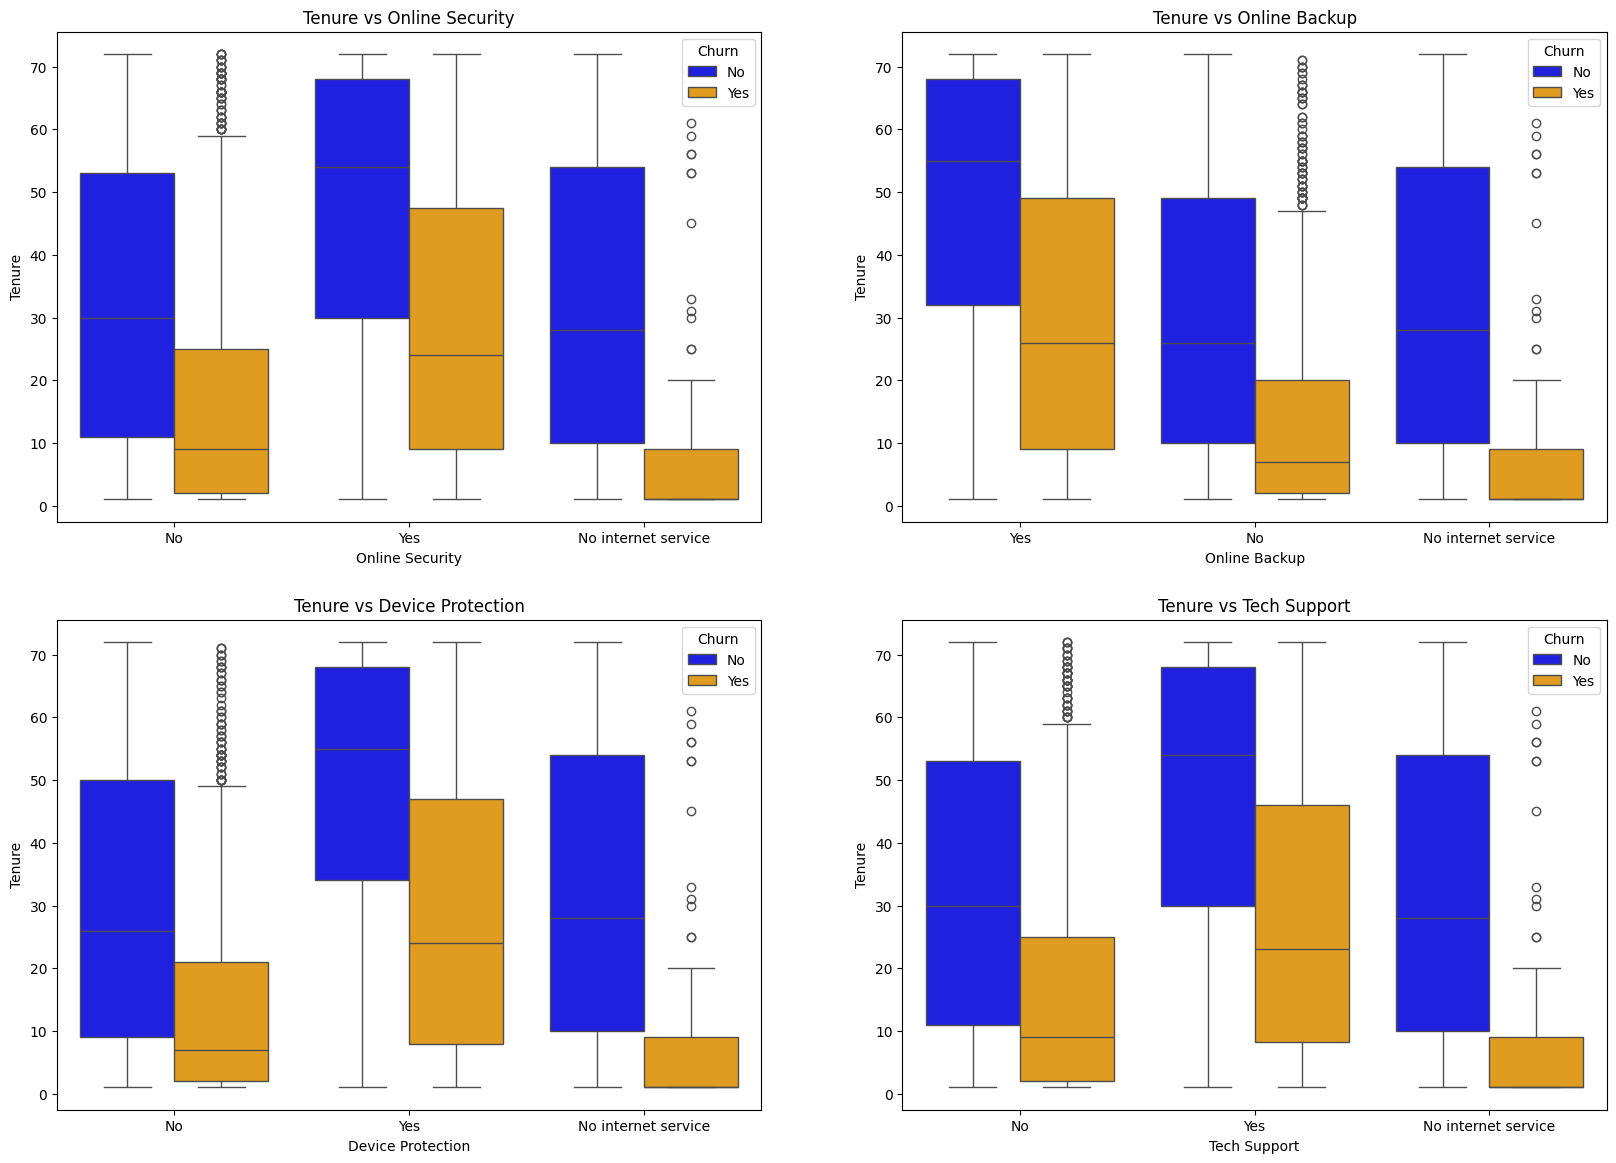

In [57]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Tenure',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Tenure vs ' + l2[i-4]);



*   For OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport, median churn tenure value is of 25 months. The highest value of this churn tenure is of around 45 months.

*   30 - 35 month period is where the customers take a call about whether to continue with the current services or switch w.r.t above features!

### Tenure vs Group 3 :

Contract | Paperless Billing | Payment Method |

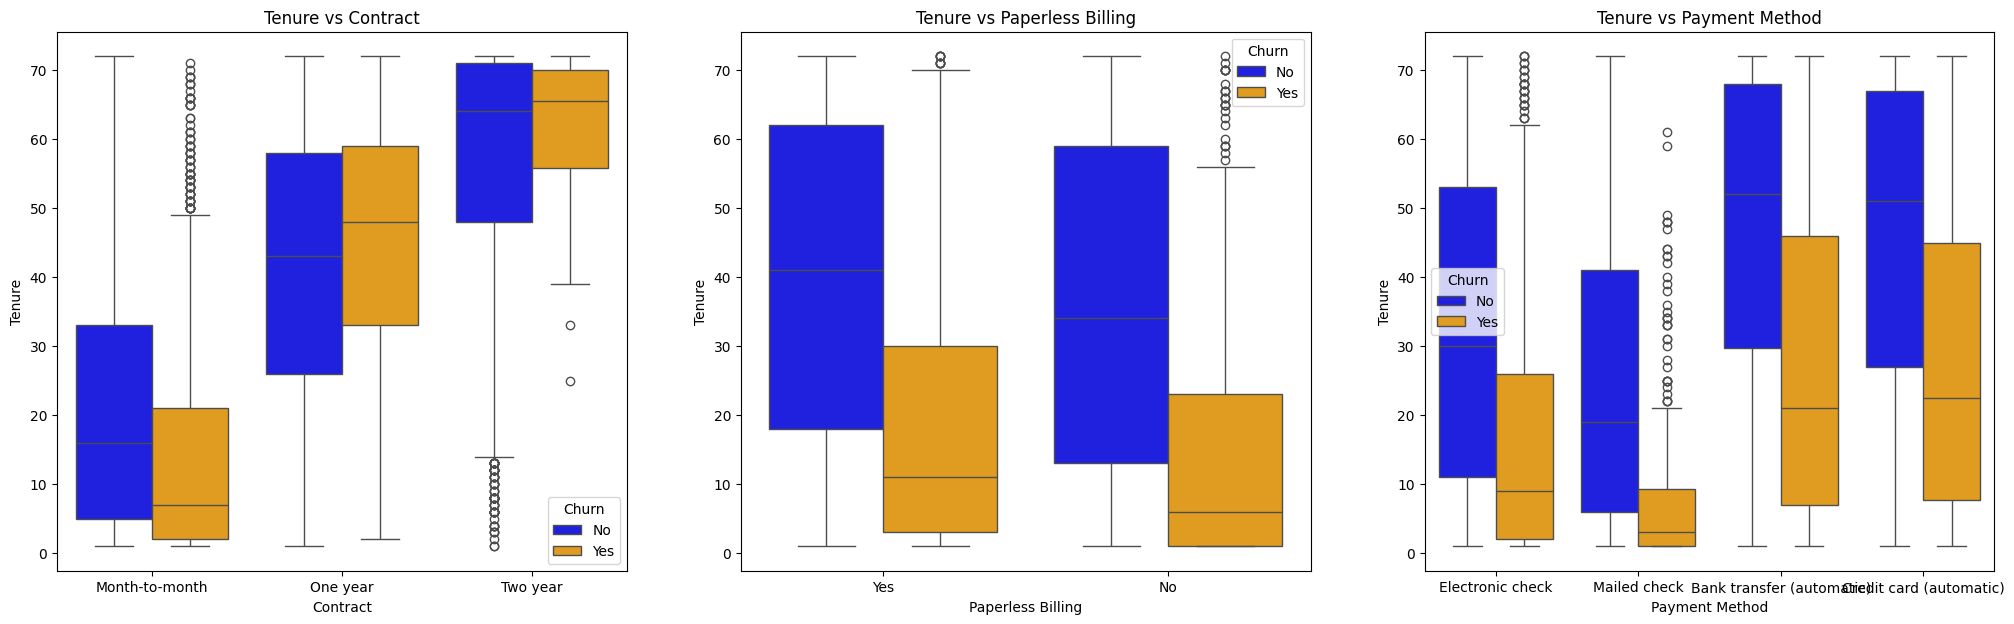

In [58]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Tenure',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Tenure vs ' + l3[i]);



*   When customers sign One year and Two year contracts for the services, they seem to continue with the services for about 25 and 45 months respectively! However, they start questioning the services and think about switching from the 35 month and 55 month mark respectively!
*   Irrespective of the PaperlessBilling, customers think of switching right from the 1st month.
*   When it comes to PaymentMethod, median churn tenure of Bank Transfer (automatic) & Credit Card (automatic), above 20 months, is nearly double than that of Electronic check & Mailed check, around 10 months & around 5 months respectively.

# Monthly Charges vs Categorical Features :



## Monthly Charges vs Group 1 :
Customer Information : Gender | Senior Citizen | Partner | Dependents |

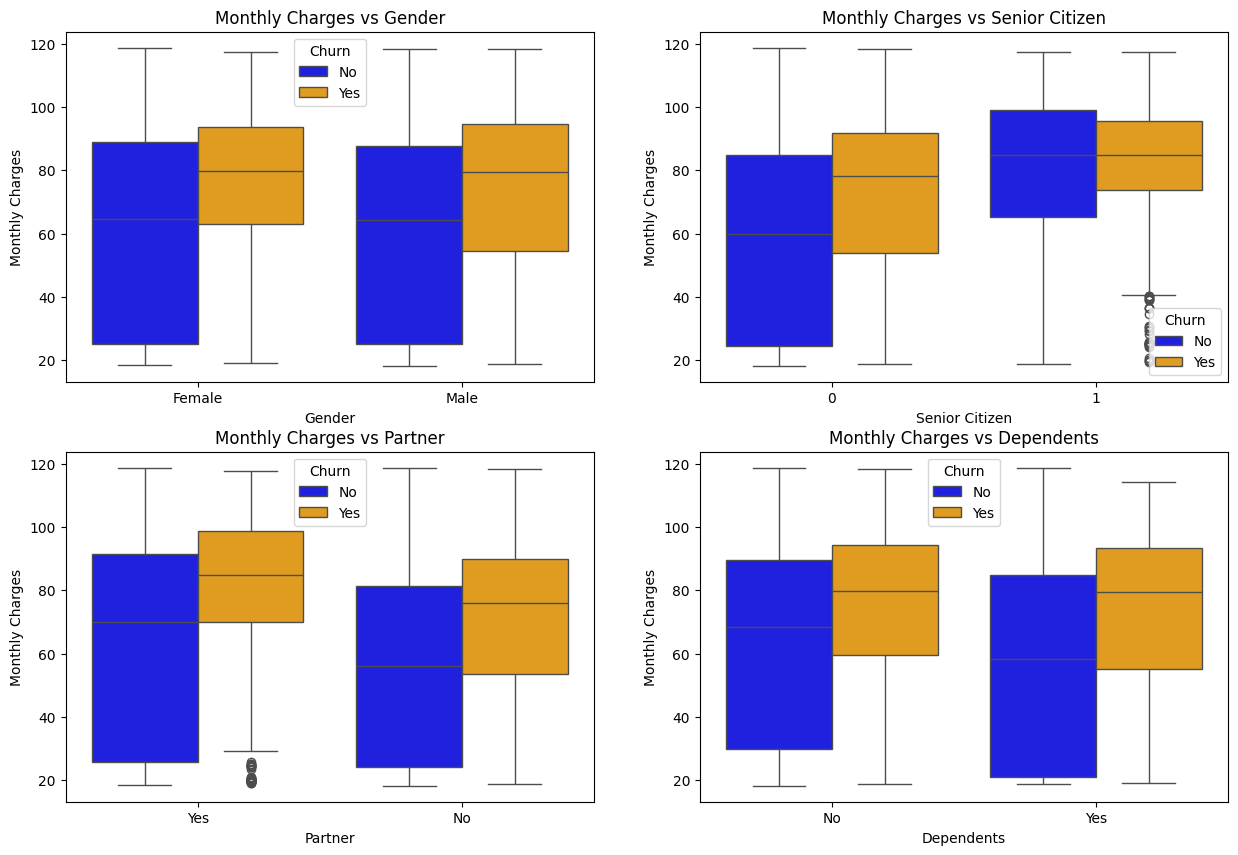

In [59]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Monthly Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Monthly Charges vs ' + l1[i]);


*   For all the features mentioned above, the median value of the not-churn customers is very close to the lower limit of the churn customers.
*   Male & Female customers have the same median MonthlyCharges of around 60. For SeniorCitizen, this value is pushed to 80.
*   Customers living with Partner have a higher lower limit of churning, MonthlyCharges of 70, than those living alone, MonthlyCharges of just below 60!




## MonthlyCharges vs Group 2:

Services Subscribed by the Customer : PhoneService | Multiple Lines | Internet Service | Streaming TV | Streaming Movies |

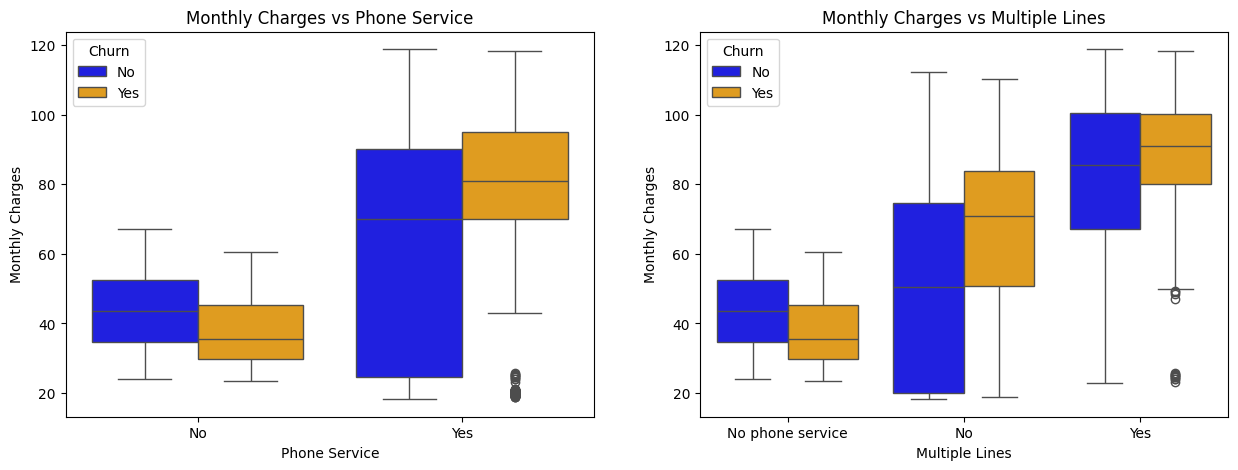

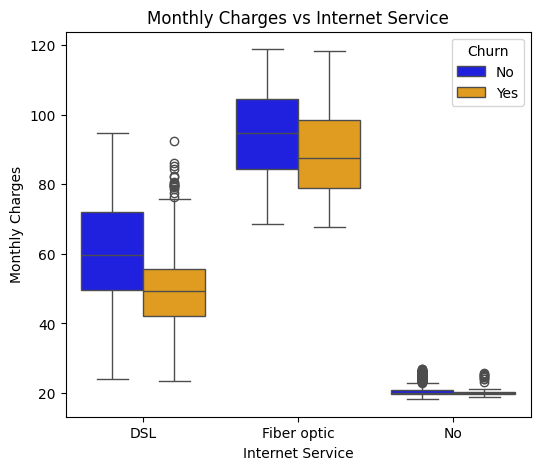

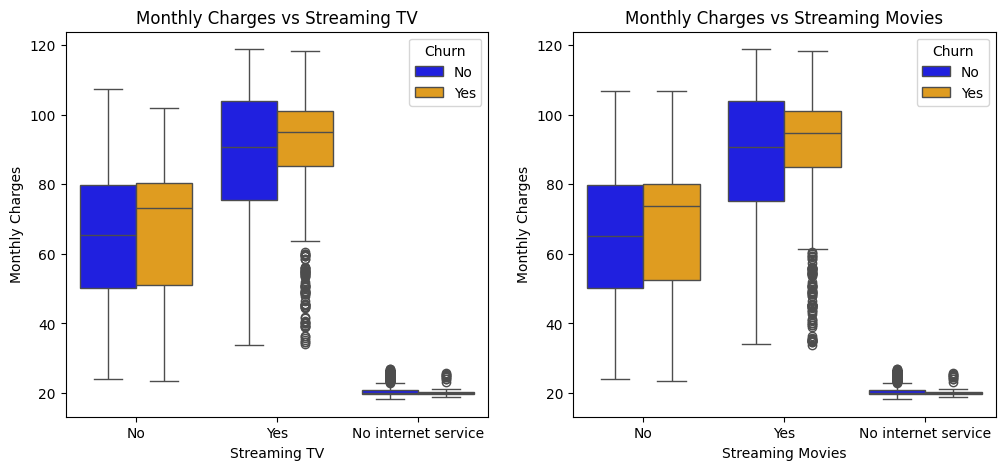

In [60]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Monthly Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Monthly Charges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Monthly Charges',data = Telco,hue = 'Churn',palette = colors);
plt.title('Monthly Charges vs ' + l2[2]);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Monthly Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Monthly Charges vs ' + l2[i + 3]);



*   MonthlyCharges of Fiber Optic cables is very high. Thus, it might be the reason for such high churn of customers.
*   Similarly, MonthlyCharges of StreamingTV & StreamingMovies is quite high.
*   Range of MonthlyCharges for PhoneService is from 25 - 85 but customers think of unsubscribing from 75 value of MonthlyCharges.

## MonthlyCharges vs Group 2:

Services Subscribed by the Customer : Online Security | Online Backup | Device Protection | TechSupport |

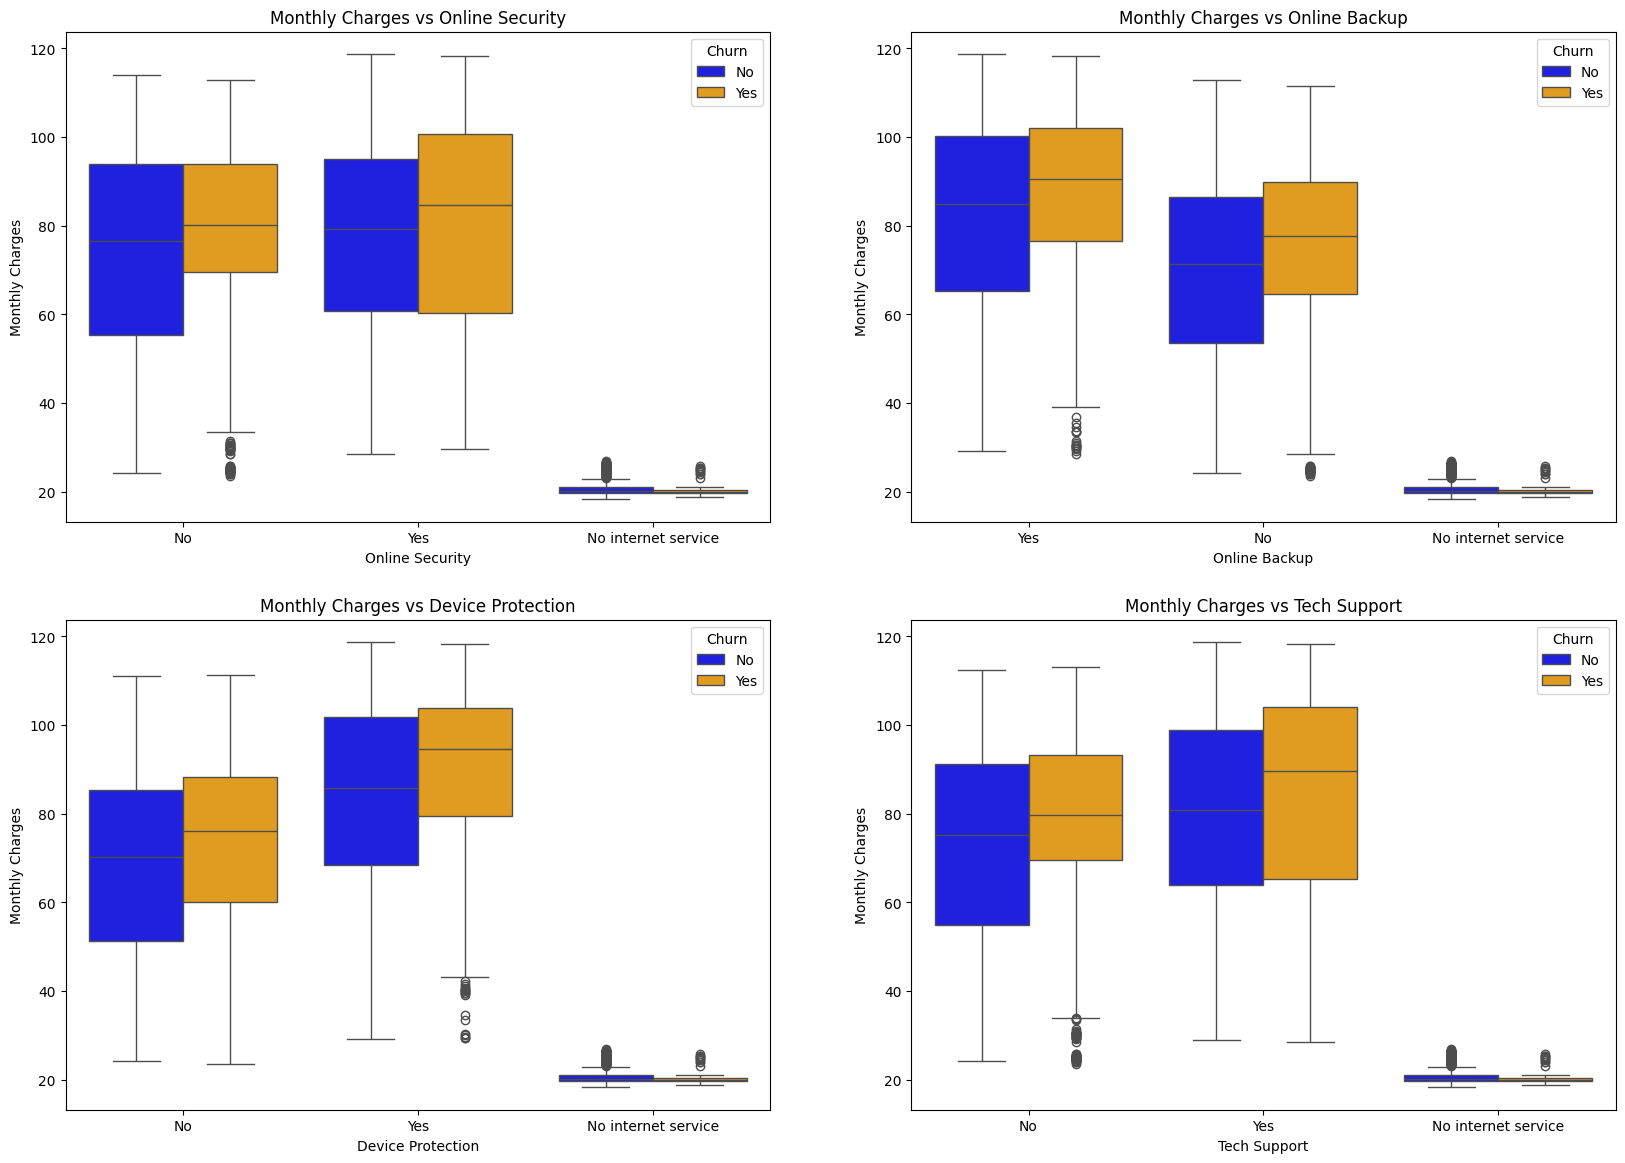

In [61]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Monthly Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Monthly Charges vs ' + l2[i-4]);


*   For OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport, range of values is from around 50 to 100.
*   Customers who subscribe who to these services, probably don't think about cancelling the subscription due to MonthlyCharges as the range of values of customers who unsubscribe & continue is near about the same!

## MonthlyCharges vs Group 3 :

Contract | Paperless Billing | Payment Method

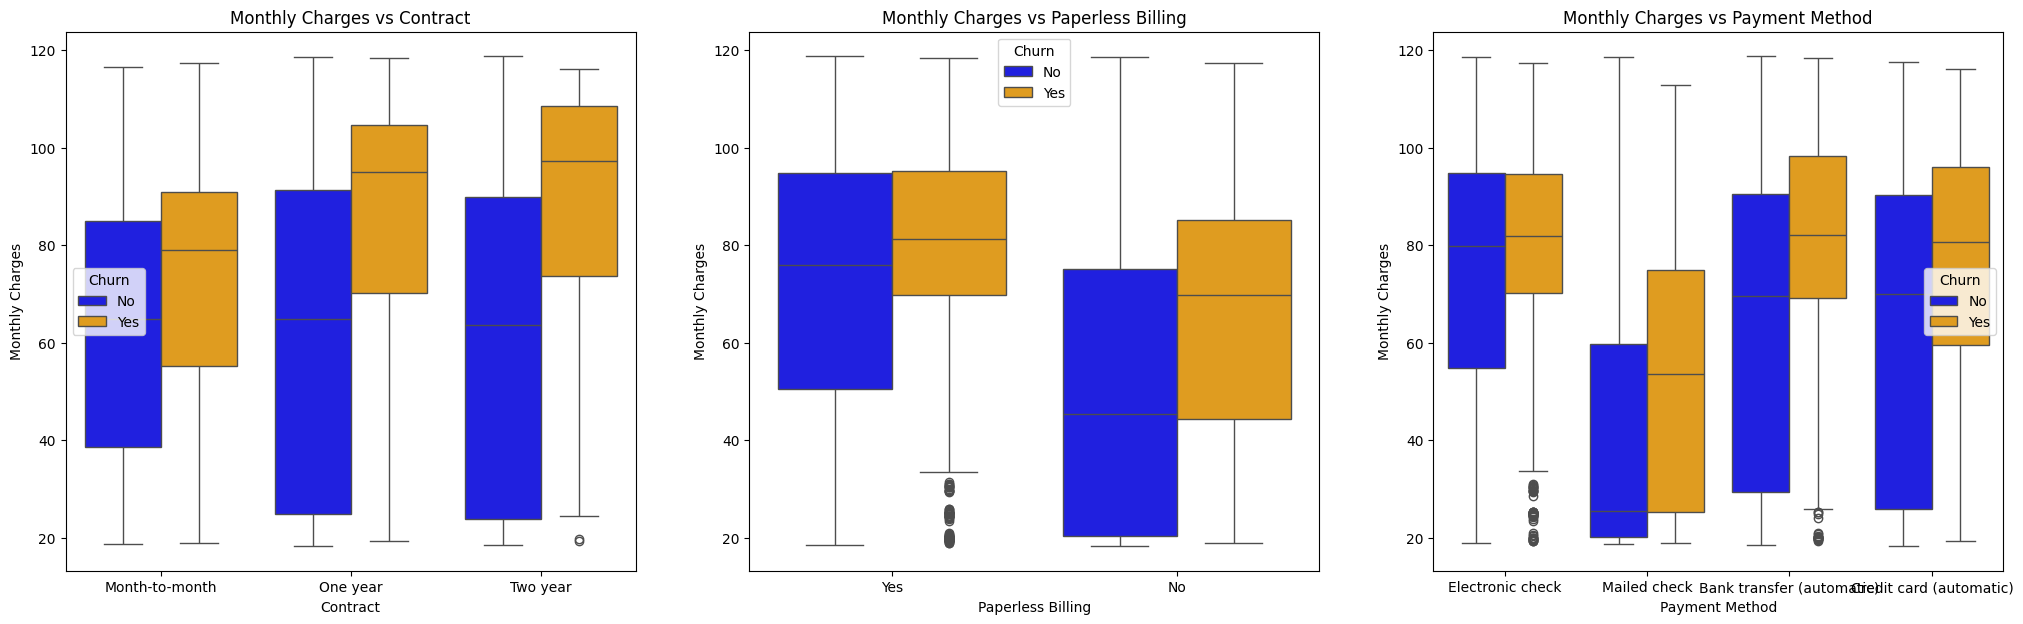

In [62]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Monthly Charges',data = Telco,hue = 'Churn',palette = colors);
    title = 'Monthly Charges vs ' + l3[i]
    plt.title(title);


*   Lower limit of the MonthlyCharges is higher for Month-to-Month contract than One year & Two year contracts. However the lower limit of the customers who discontinue the services is lower for Month-to-Month contract.
*   Lower limit of the Electronic check is very high and it can be a huge factor due to which customers resent using it! Whereas Mailed check has the lowest starting values of customers who left and continued.

# TotalCharges vs Categorical Features

## TotalCharges vs Group 1 :

Customer Information : Gender | Senior Citizen | Partner | Dependents |

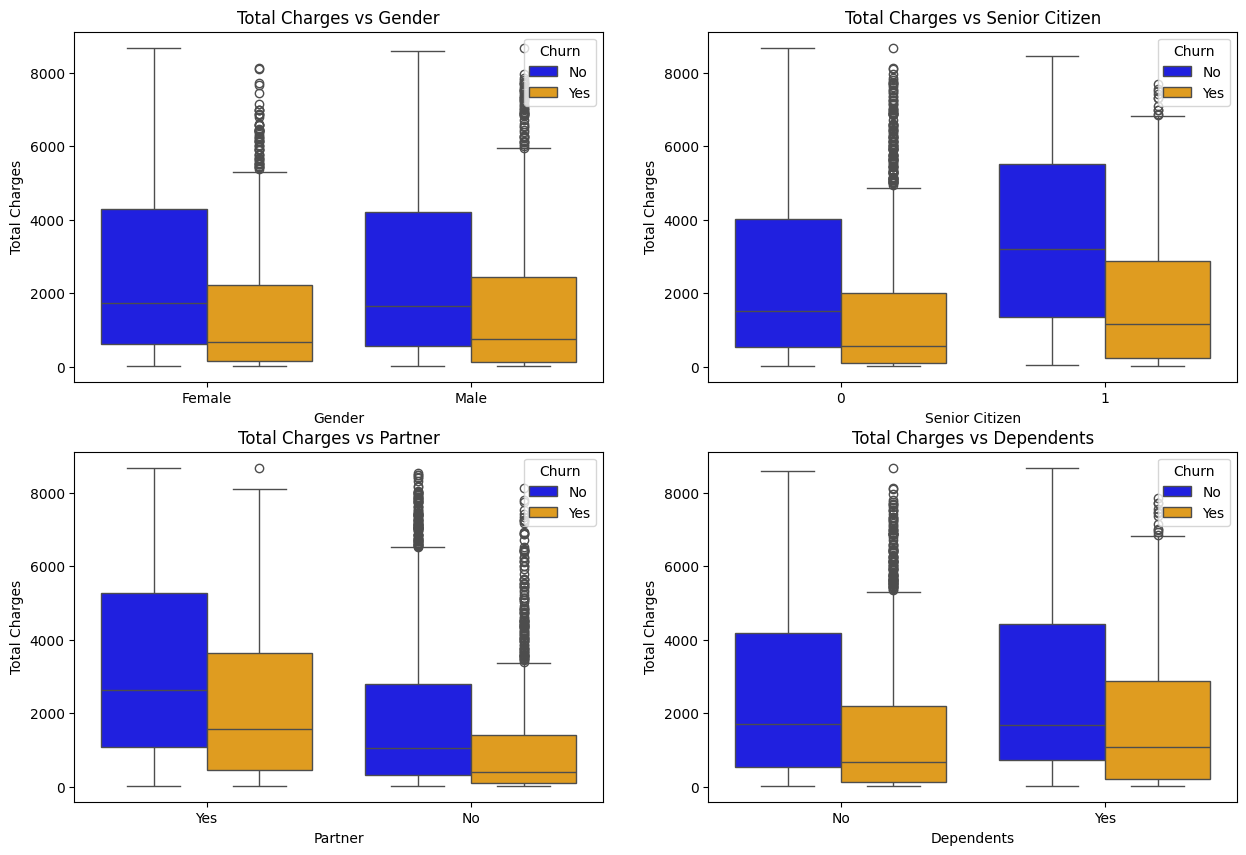

In [63]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Total Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Total Charges vs ' + l1[i]);


*   TotalCharges for male & female customers is quite the same! SeniorCitizen that continued with the services have a higher starting and closing values of TotalCharges.
*   Customers housing with their Partner have a higher median value of TotalCharges as compared to those living alone!

## TotalCharges vs Group 2:

Services Subscribed by the Customer : Phone Service | Multiple Lines | Internet Service | Streaming TV | Streaming Movies |

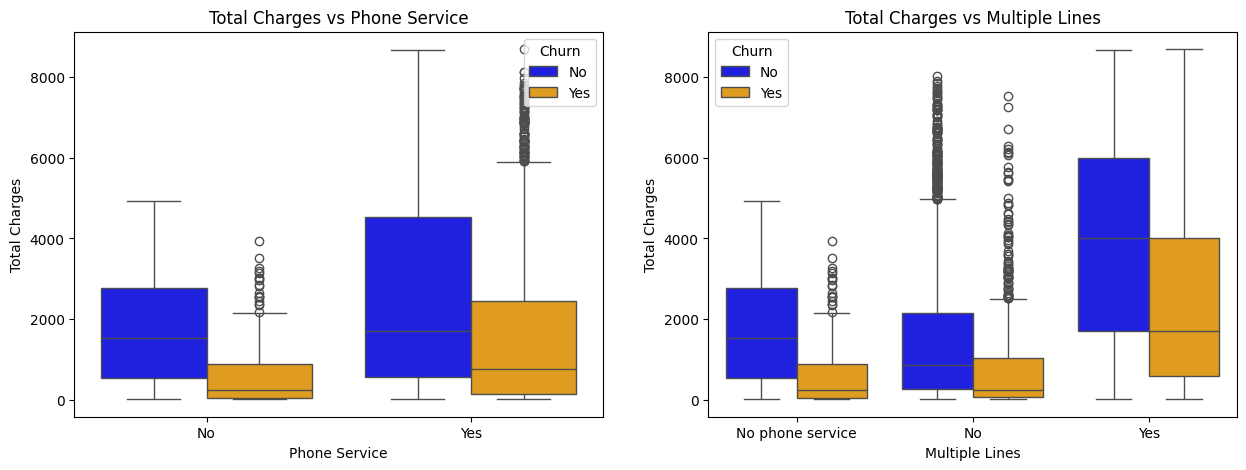

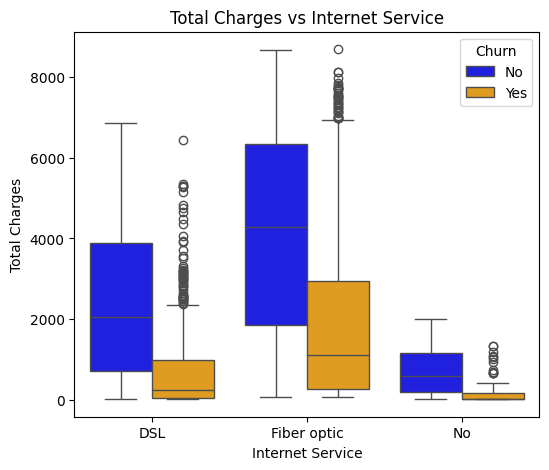

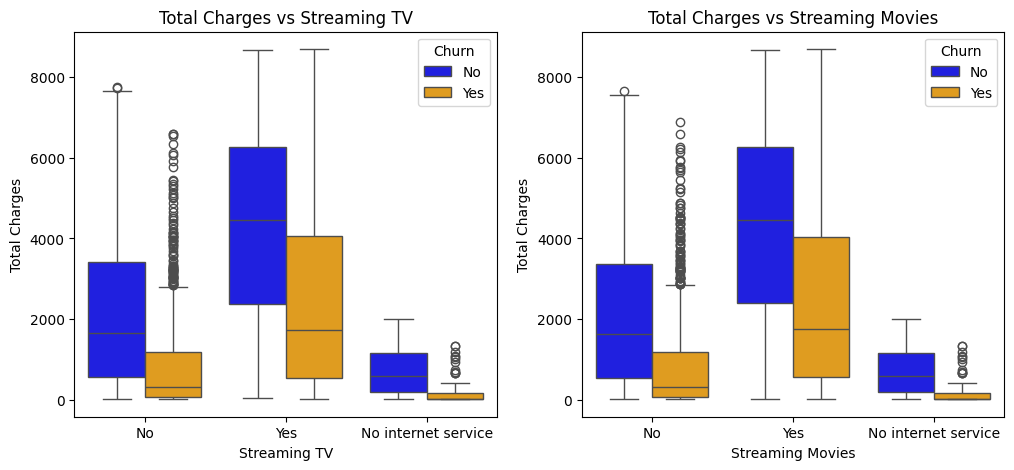

In [64]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Total Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Total Charges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Total Charges',data = Telco,hue = 'Churn',palette = colors);
plt.title('Total Charges vs ' + l2[2]);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Total Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Total Charges vs ' + l2[i + 3]);


*  TotalCharges of PhoneService range from 0 - 4000. However, customers start getting 2nd thoughts about PhoneService due to TotalCharges from around 1000.
*   Similarly, customers start to hesitate to pay around 2000 for MultipleLines. However, some customers seem to be desperate for MultipleLines as they paid a value of around 6000 for it!
*   When it comes to paying for Fiber Optic cables, customers test out the products by paying around 2000!
*   Similar to Fiber Optic, StreamingTV & StreamingMovies, customers that continue with the services pay from 3000 - 6000.

## TotalCharges vs Group 2:

Services Subscribed by the Customer : Online Security | Online Backup | Device Protection | TechSupport |

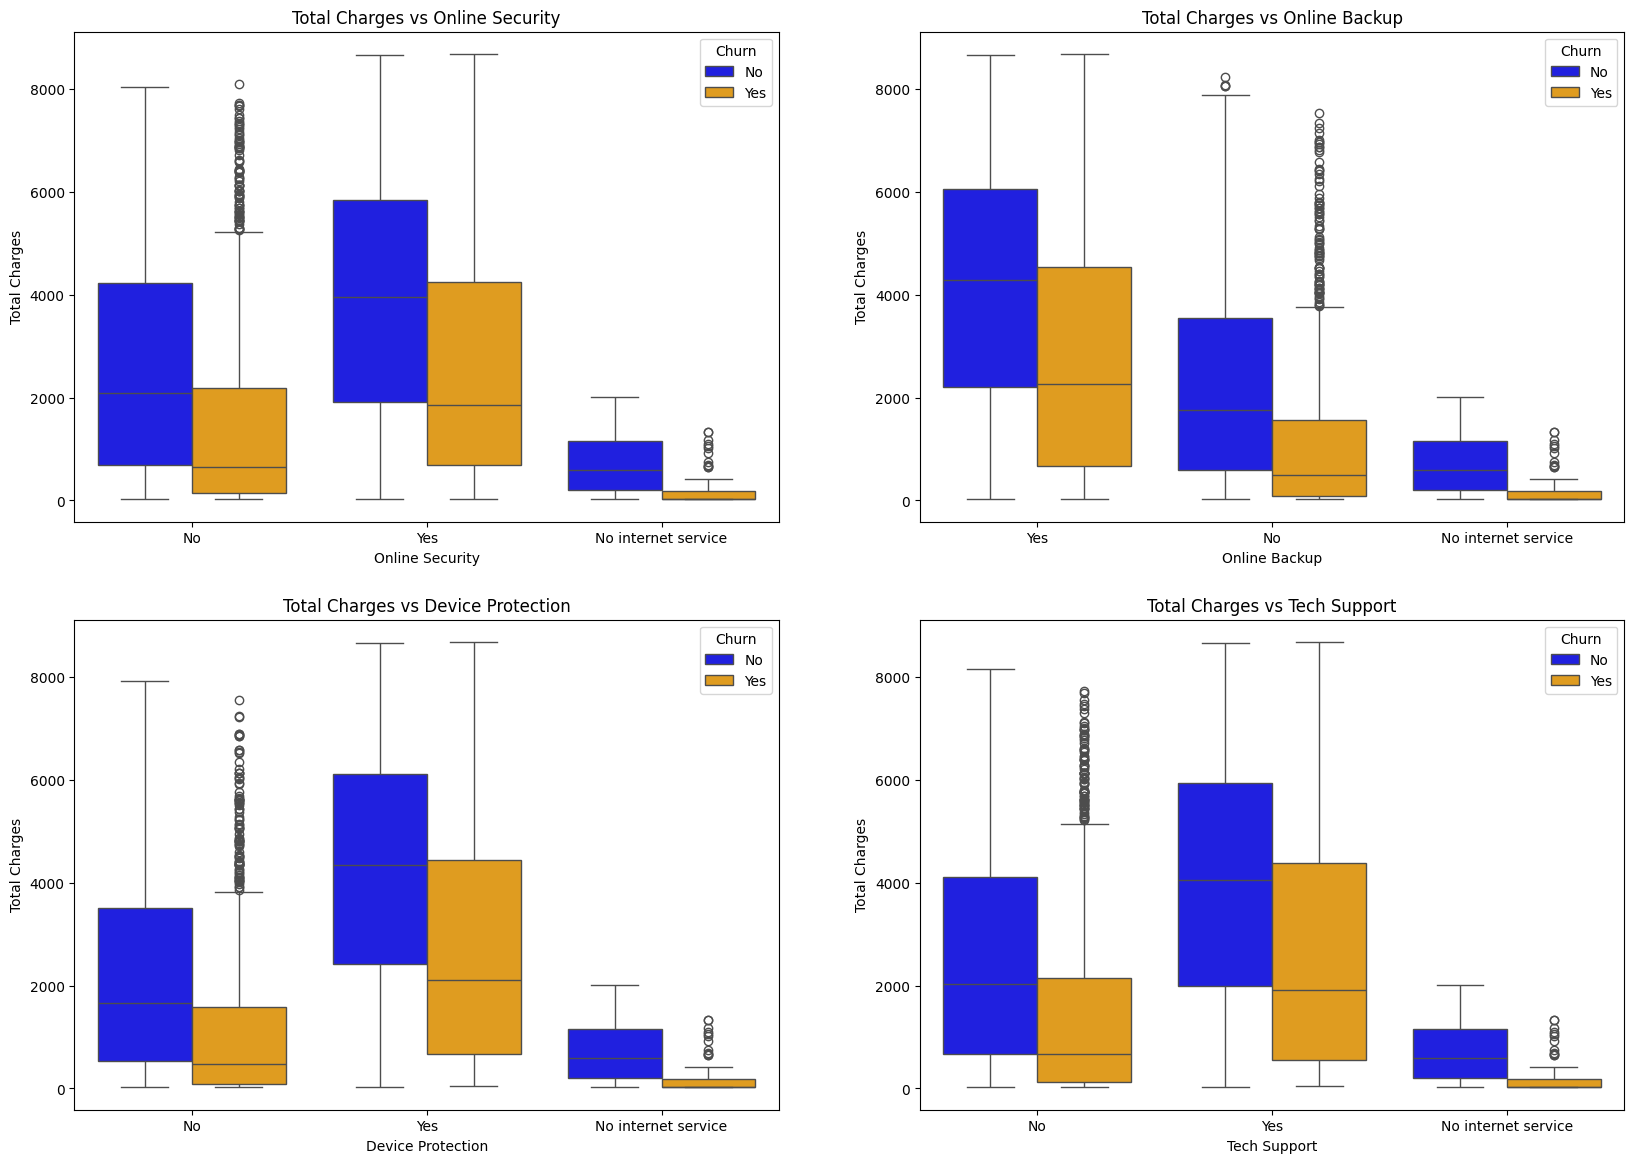

In [65]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Total Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Total Charges vs ' + l2[i-4]);


*   For all the features mentioned above, customers become skeptical about paying for them around the 2000 mark. This median value of churn customers is very close to the lower limit of the customers that carry on with this service.
*   Customers that do not churn out are ready to pay from 2000 - 6000 of TotalCharges.

## TotalCharges vs Group 3 :

Contract | Paperless Billing | Payment Method |

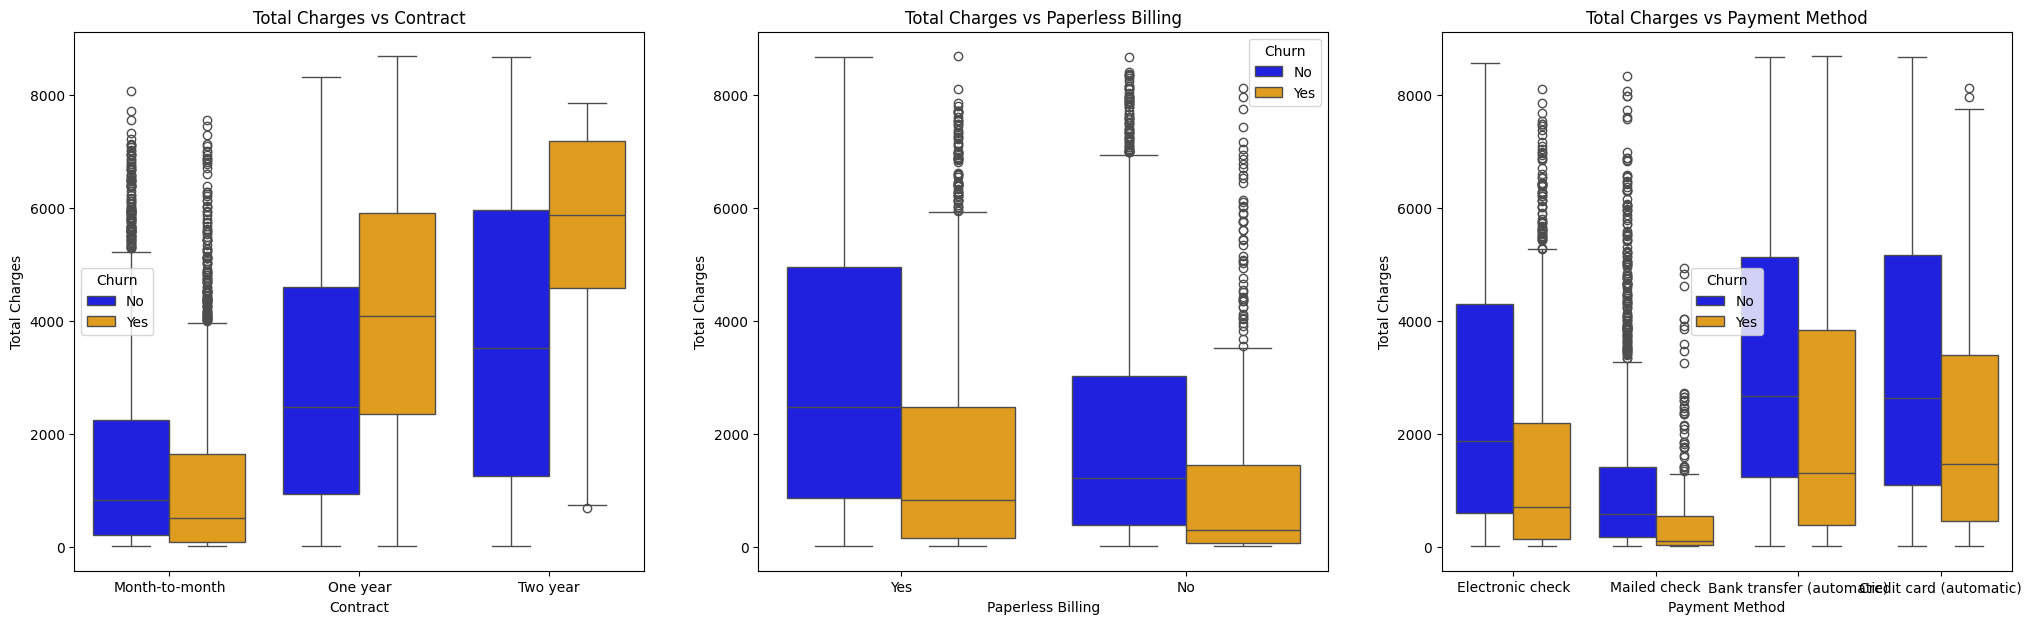

In [66]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Total Charges',data = Telco,hue = 'Churn',palette = colors);
    plt.title('Total Charges vs ' + l3[i]);


*   Median values of customers that decide to opt out from the services that have One year & Two year contracts is high at around 4000 & 6000. Some of the customers with Two year contracts even paid around 7000.
*   For PaymentMethod, customers are skeptical to pay using Electronic check for a shorter range of 0 - 2000 whereas for Bank transfer (automatic) & Credit Card (automatic) this range is around 0 - 4000.





# Numerical features vs Numerical features w.r.t Target variable (Churn)

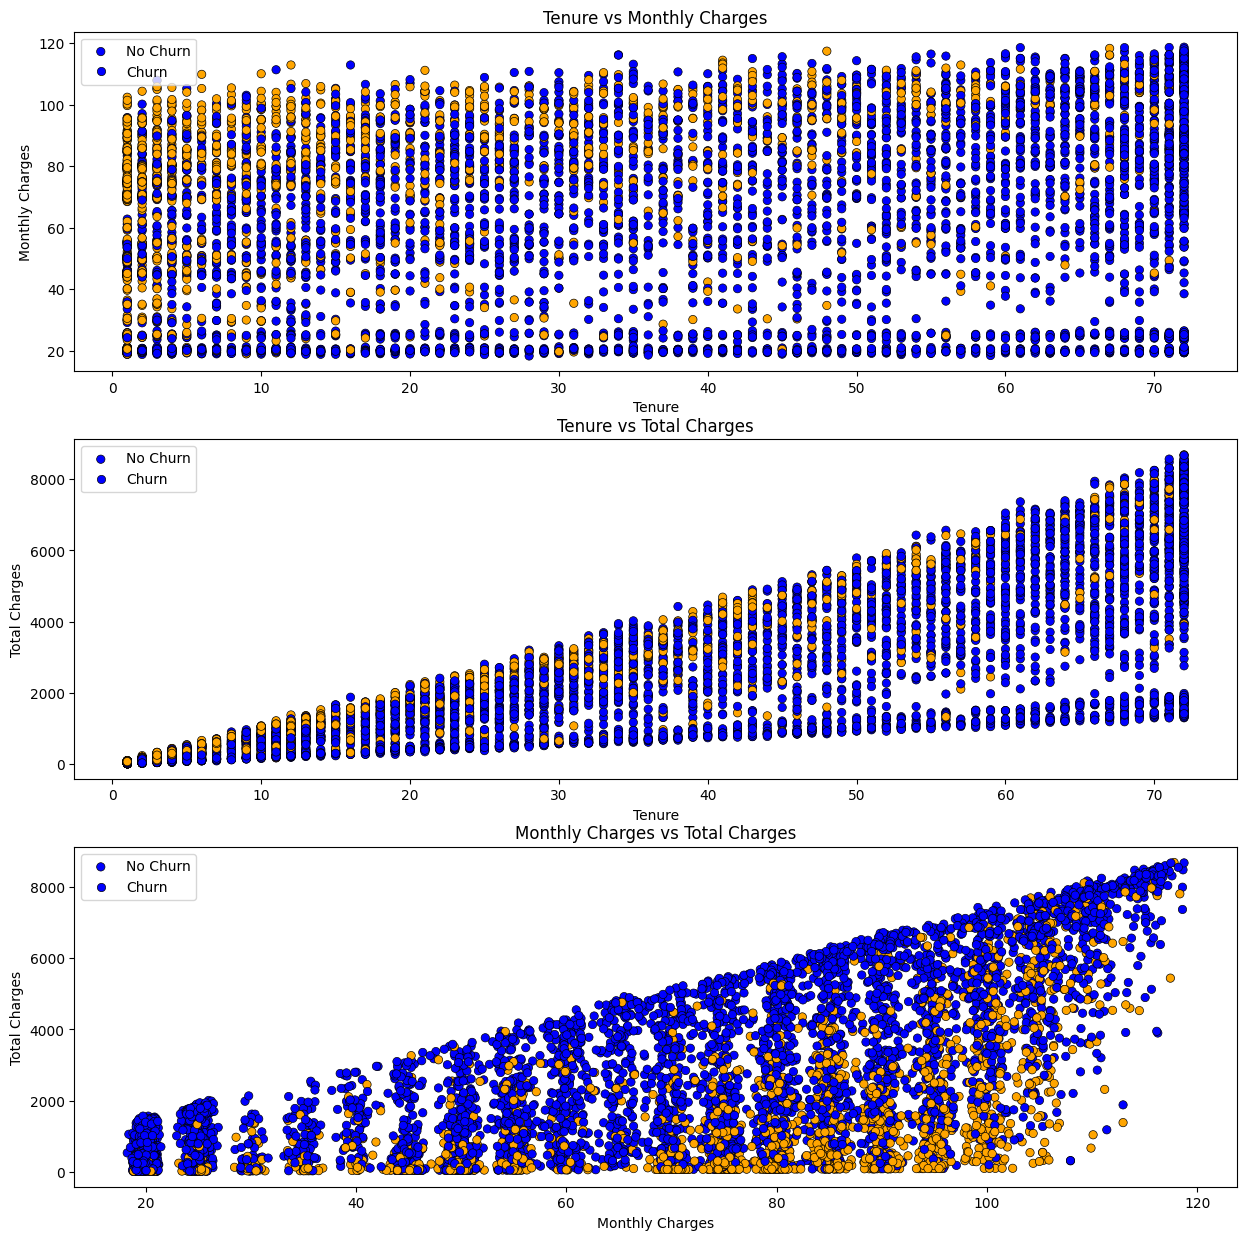

In [67]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = Telco1,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)


*   For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values. For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.

*   For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!
*   Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.


**Summary of EDA**

Order / Values of features for customer churn cases :

**Categorical Features (Order) :**

1.   Gender : Male = Female
2.   List item
3.   SeniorCitizen : No SeniorCitizen > SeniorCitizen
4.   Partner : No Partner > Partner
5.   Dependents : No Dependent > Dependent
6.   PhoneService : PhoneService > No PhoneService
7.   MultipleLines : MultipleLines > No MultipleLines > No PhoneService
8.   InternetService : Fiber Optic > DSL > No InternetService
9.   OnlineSecurity : Absent > Present > No InternetService
10.  OnlineBackup : Absent > Present > No InternetService
11. DeviceProtection : Absent > Present > No InternetService
12. TechSupport : Absent > Present > No InternetService
13. StreamingTV : Absent > Present > No InternetService
14. StreamingMovies : Absent > Present > No InternetService
15. Contract : Month-to-Month > One year > Two year
16. PaperlessBilling : Present > Absent
17. PaymentMethod : Electronic check > Mailed check > Bank
18. Transfer (automatic) > Credit Card (automatic)!


**Numerical Features (Range) :**

1. Tenure : 1 - 5 months
2. Monthly Charges : 65 - 105
3. Total Charges : 0 - 1000

# Data Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

Telco1.drop(columns = ['Monthly Charges_Group','Total Charges_Group'], inplace = True)

Telco1['Tenure'] = mms.fit_transform(Telco1[['Tenure']])
Telco1['Monthly Charges'] = mms.fit_transform(Telco1[['Monthly Charges']])
Telco1['Total Charges'] = mms.fit_transform(Telco1[['Total Charges']])
Telco1.head()

Gender  Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
0       0               0        1           0    0.00              0   
1       1               0        0           0    0.46              1   
2       1               0        0           0    0.01              1   
3       1               0        0           0    0.62              0   
4       0               0        0           0    0.01              1   

   Multiple Lines  Internet Service  Online Security  Online Backup  \
0               1                 0                0              2   
1               0                 0                2              0   
2               0                 0                2              2   
3               1                 0                2              0   
4               0                 1                0              0   

   Device Protection  Tech Support  Streaming TV  Streaming Movies  Contract  \
0                  0             0             0                 0         0   
1                  2             0             0                 0         1   
2                  0             0             0                 0         0   
3                  2             2             0                 0         1   
4                  0             0             0                 0         0   

   Paperless Billing  Payment Method  Monthly Charges  Total Charges  Churn  
0                  1               2             0.12           0.00      0  
1                  0               3             0.39           0.22      0  
2                  1               3             0.35           0.01      1  
3                  0               0             0.24           0.21      0  
4                  1               2             0.52           0.02      1


*   Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.
Eg : Age = Years; FastingBS = mg / dl; Charges = Currency

*   We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
*   Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.
*   Standardization : None of the features are standardized for the above data.







**Correlation Matrix **

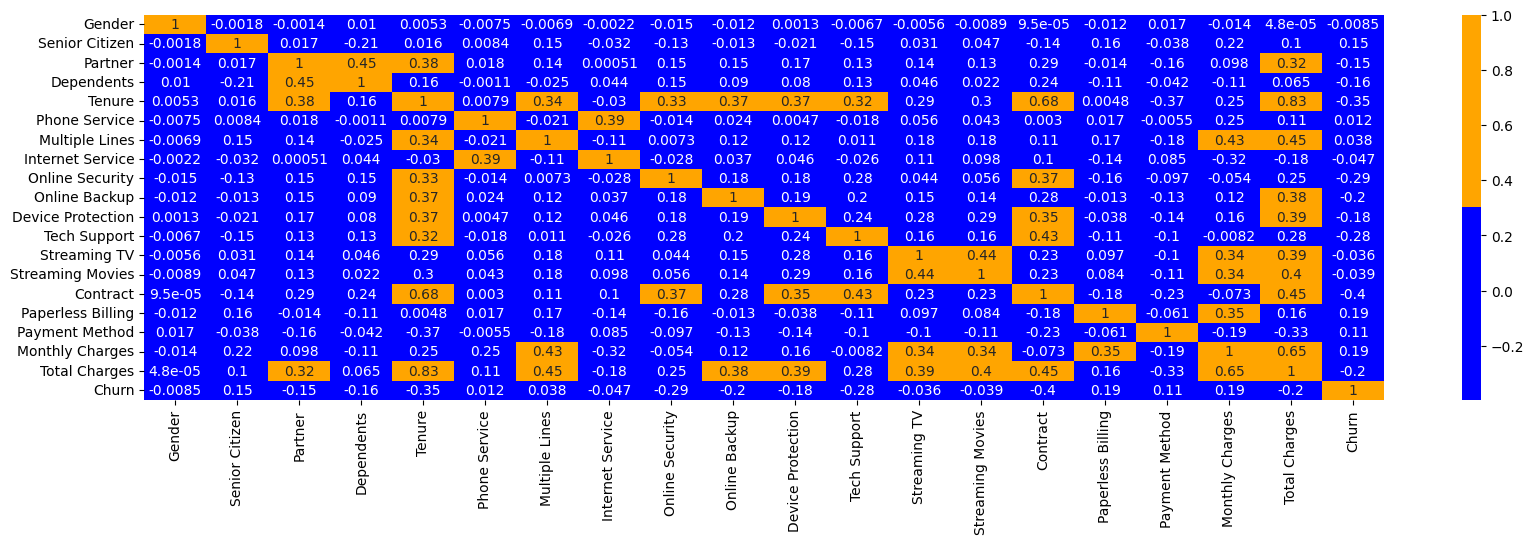

In [69]:
plt.figure(figsize = (20,5))
sns.heatmap(Telco1.corr(),cmap = colors,annot = True);

It is a huge matrix with too many features. We will check the correlation only with respect to Churn.

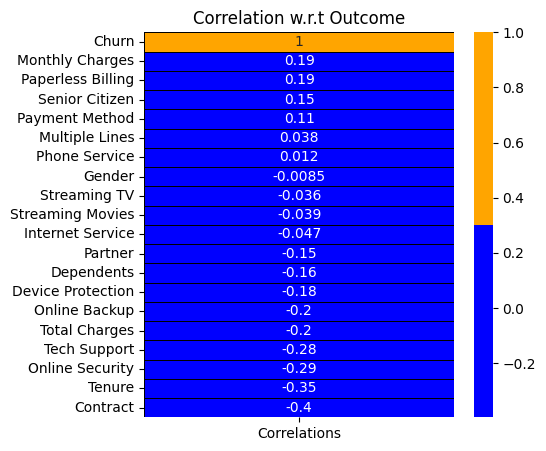

In [70]:
corr = Telco1.corrwith(Telco1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');


*   MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
*   Remaining features either display a significant positive or negative correlation.

**Feature Selection for Categorical Features :**

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

**Chi-Squared Test :**

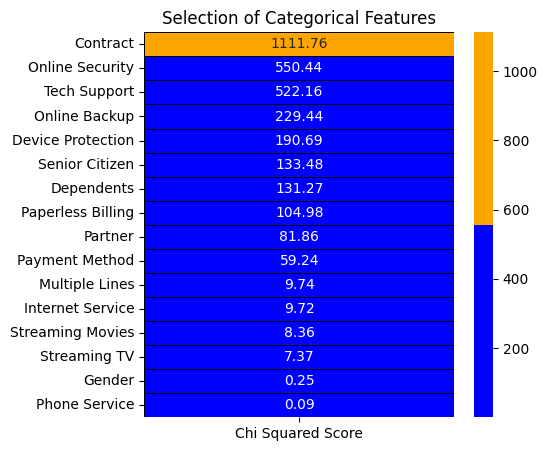

In [72]:
features = Telco1.loc[:,categorical_features]
target = Telco1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');


*   PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

**Feature Selection for Numerical Features :**

In [73]:
from sklearn.feature_selection import f_classif

**ANOVA Test :**

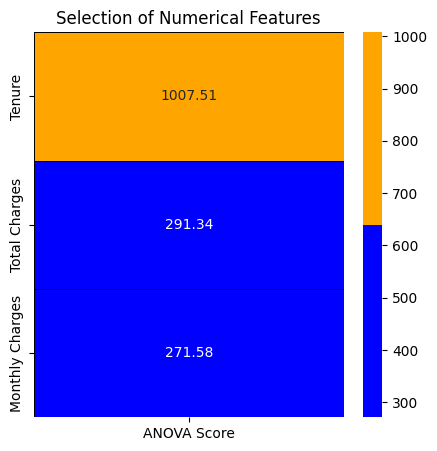

In [74]:
features = Telco1.loc[:,numerical_features]
target = Telco1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');


*   According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
*   From the above results, we need to include all the numerical features for modeling.

In [75]:
Telco1.drop(columns = ['Phone Service', 'Gender','Streaming TV','Streaming Movies','Multiple Lines','Internet Service'],inplace = True)
Telco1.head()

Senior Citizen  Partner  Dependents  Tenure  Online Security  \
0               0        1           0    0.00                0   
1               0        0           0    0.46                2   
2               0        0           0    0.01                2   
3               0        0           0    0.62                2   
4               0        0           0    0.01                0   

   Online Backup  Device Protection  Tech Support  Contract  \
0              2                  0             0         0   
1              0                  2             0         1   
2              2                  0             0         0   
3              0                  2             2         1   
4              0                  0             0         0   

   Paperless Billing  Payment Method  Monthly Charges  Total Charges  Churn  
0                  1               2             0.12           0.00      0  
1                  0               3             0.39           0.22      0  
2                  1               3             0.35           0.01      1  
3                  0               0             0.24           0.21      0  
4                  1               2             0.52           0.02      1

#Checking the balance of target variable

In [76]:
counts = Telco1['Churn'].value_counts()
print("Count of 'Yes':", counts[1])
print("Count of 'No':", counts[0])

Count of 'Yes': 1869
Count of 'No': 5163


# **Data Balancing :**

In order to cope with unbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable.
Oversampling : Increase the minority samples of the target variable to the majority samples.
After doing trial-error with undersampling & oversampling, we have decided to go with oversampling!
For data balancing, we will use imblearn.
pip statement : pip install imbalanced-learn

**Split into Train and Test set**

In [77]:
x = Telco1[['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']]

In [78]:
x

Senior Citizen  Partner  Dependents  Tenure  Online Security  \
0                  0        1           0    0.00                0   
1                  0        0           0    0.46                2   
2                  0        0           0    0.01                2   
3                  0        0           0    0.62                2   
4                  0        0           0    0.01                0   
...              ...      ...         ...     ...              ...   
7038               0        1           1    0.32                2   
7039               0        1           1    1.00                0   
7040               0        1           1    0.14                2   
7041               1        1           0    0.04                0   
7042               0        0           0    0.92                2   

      Online Backup  Device Protection  Tech Support  Contract  \
0                 2                  0             0         0   
1                 0                  2             0         1   
2                 2                  0             0         0   
3                 0                  2             2         1   
4                 0                  0             0         0   
...             ...                ...           ...       ...   
7038              0                  2             2         1   
7039              2                  2             0         1   
7040              0                  0             0         0   
7041              0                  0             0         0   
7042              0                  2             2         2   

      Paperless Billing  Payment Method  Monthly Charges  Total Charges  
0                     1               2             0.12           0.00  
1                     0               3             0.39           0.22  
2                     1               3             0.35           0.01  
3                     0               0             0.24           0.21  
4                     1               2             0.52           0.02  
...                 ...             ...              ...            ...  
7038                  1               3             0.66           0.23  
7039                  1               1             0.85           0.85  
7040                  1               2             0.11           0.04  
7041                  1               3             0.56           0.03  
7042                  1               0             0.87           0.79  

[7032 rows x 13 columns]

In [79]:
y = Telco1['Churn']
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 2 )

In [82]:
x_train

Senior Citizen  Partner  Dependents  Tenure  Online Security  \
4750               0        0           0    0.11                2   
1899               0        0           0    0.23                0   
3327               0        1           0    0.92                0   
5125               0        1           0    0.14                0   
1788               0        1           0    0.79                1   
...              ...      ...         ...     ...              ...   
6452               0        0           0    0.20                2   
3612               0        0           0    0.28                0   
5713               1        0           0    0.68                2   
6646               0        1           1    0.70                1   
2580               1        0           1    0.41                0   

      Online Backup  Device Protection  Tech Support  Contract  \
4750              2                  2             0         1   
1899              2                  2             0         0   
3327              2                  2             0         1   
5125              0                  0             0         0   
1788              1                  1             1         2   
...             ...                ...           ...       ...   
6452              0                  0             0         0   
3612              0                  0             0         0   
5713              2                  2             2         2   
6646              1                  1             1         1   
2580              0                  0             2         0   

      Paperless Billing  Payment Method  Monthly Charges  Total Charges  
4750                  0               3             0.21           0.04  
1899                  1               1             0.72           0.18  
3327                  0               2             0.77           0.72  
5125                  1               2             0.75           0.12  
1788                  1               0             0.01           0.13  
...                 ...             ...              ...            ...  
6452                  1               0             0.69           0.14  
3612                  1               2             0.55           0.18  
5713                  0               1             0.63           0.47  
6646                  0               3             0.01           0.11  
2580                  1               2             0.83           0.34  

[5625 rows x 13 columns]

In [83]:
len(x_train)

5625

In [84]:
len(x_test)

1407

In [85]:
len(y_train)

5625

In [86]:
len(y_test)

1407

# **Building the models**

In [154]:
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

## **Decision Tree Classifier**

### **Decision Tree Classifier with Oversampling**

In [163]:
sm = SMOTEENN()
x_oversampled, y_oversampled = sm.fit_resample(x_train, y_train)
print(len(x_oversampled), len(y_oversampled))

4788 4788


Validation Score (Mean): 91.54%
ROC AUC Score: 98.35%




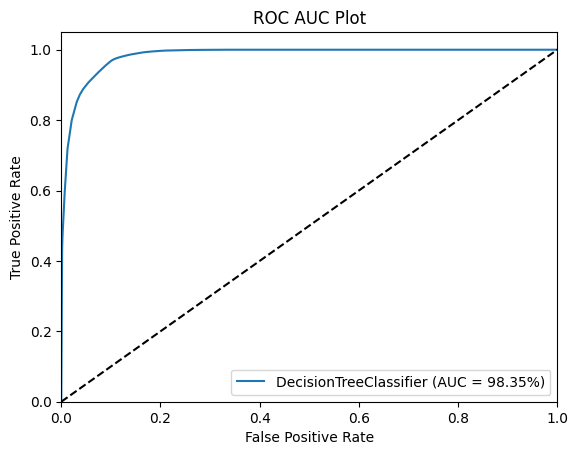





Model Score (Training Accuracy): 93.46%

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2343
           1       0.91      0.97      0.94      2445

    accuracy                           0.93      4788
   macro avg       0.94      0.93      0.93      4788
weighted avg       0.94      0.93      0.93      4788







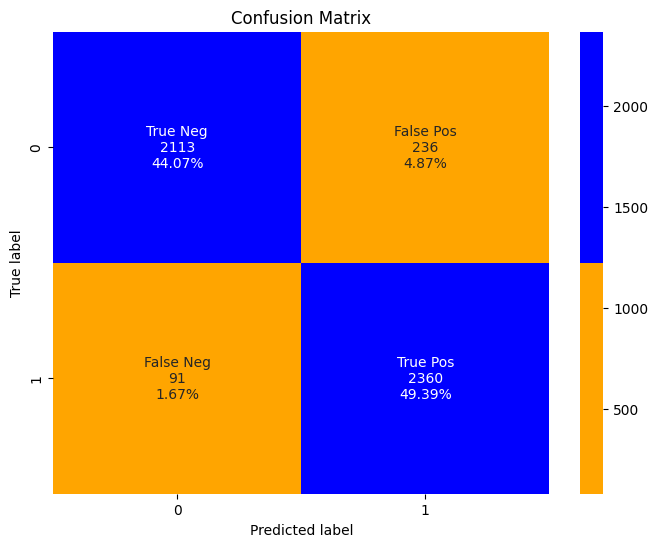

In [164]:
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(x_oversampled, y_oversampled)

yr_predict = model_dt_smote.predict(x_oversampled)
model_score_r = model_dt_smote.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(model_dt_smote, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_oversampled, yr_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_oversampled, yr_predict)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn, fp, fn, tp]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### **Decision Tree Classifier with Undersampling**


In [136]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_undersampled, y_undersampled = rus.fit_resample(x_train, y_train)
print(len(x_undersampled),len(y_undersampled))

2990 2990


Validation Score (Mean): 73.58%
ROC AUC Score: 87.00%




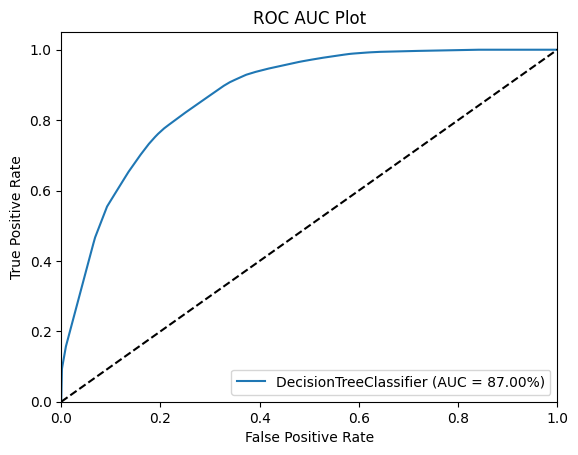





Model Score (Training Accuracy): 78.56%

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1495
           1       0.77      0.82      0.79      1495

    accuracy                           0.79      2990
   macro avg       0.79      0.79      0.79      2990
weighted avg       0.79      0.79      0.79      2990







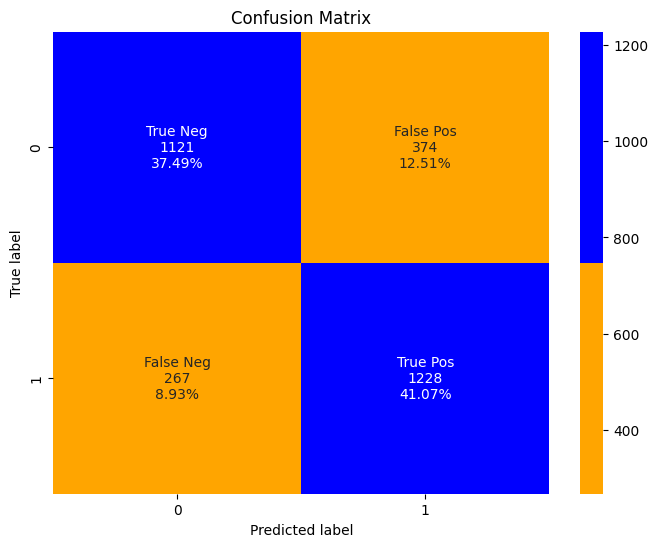

In [139]:
model_dt_under = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_under.fit(x_undersampled, y_undersampled)

under_predict = model_dt_under.predict(x_undersampled)
model_score_r = model_dt_under.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(model_dt_under, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, model_dt_under.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, model_dt_under.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_undersampled, under_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_undersampled, under_predict)
tn_dun, fp_dun, fn_dun, tp_dun = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_dun, fp_dun, fn_dun, tp_dun]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **Decision Tree Classifier with Imbalanced data**

Validation Score (Mean): 79.01%
ROC AUC Score: 85.73%




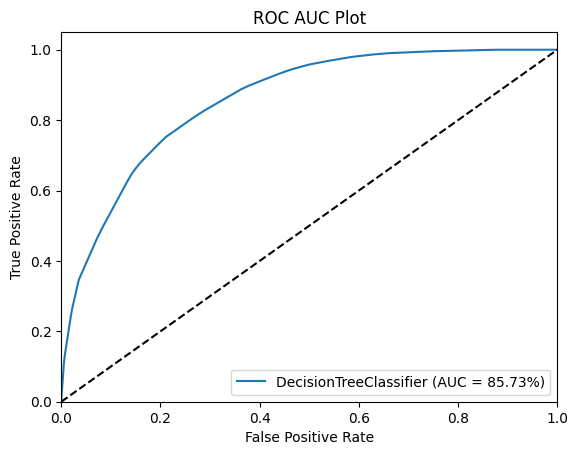





Model Score (Training Accuracy): 80.47%

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      5163
           1       0.70      0.47      0.56      1869

    accuracy                           0.80      7032
   macro avg       0.76      0.70      0.72      7032
weighted avg       0.79      0.80      0.79      7032







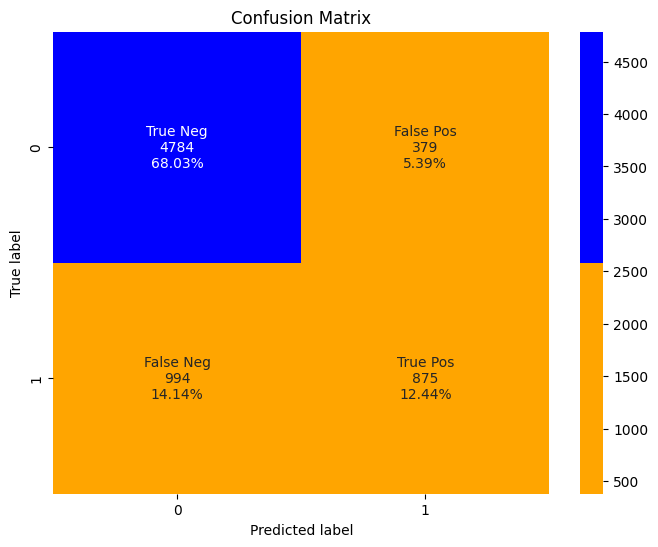

In [140]:
model_imbalnce = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_imbalnce.fit(x, y)

imb_predict = model_imbalnce.predict(x)
model_score_r = model_imbalnce.score(x, y)

# Validation Score
validation_score = cross_val_score(model_imbalnce, x, y, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y, model_imbalnce.predict_proba(x)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y, model_imbalnce.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y, imb_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y, imb_predict)
tn_dim, fp_dim, fn_dim, tp_dim = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_dim, fp_dim, fn_dim, tp_dim]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## **Random Forest Classifier**

In [112]:
from sklearn.ensemble import RandomForestClassifier

### **Random Forest Classifer with Oversampling**

4787 4787
Validation Score (Mean): 92.04%
ROC AUC Score: 98.44%




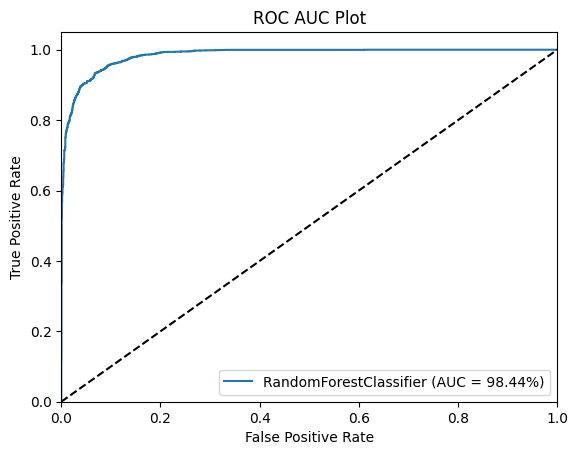





Model Score (Training Accuracy): 92.96%

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2333
           1       0.92      0.94      0.93      2454

    accuracy                           0.93      4787
   macro avg       0.93      0.93      0.93      4787
weighted avg       0.93      0.93      0.93      4787







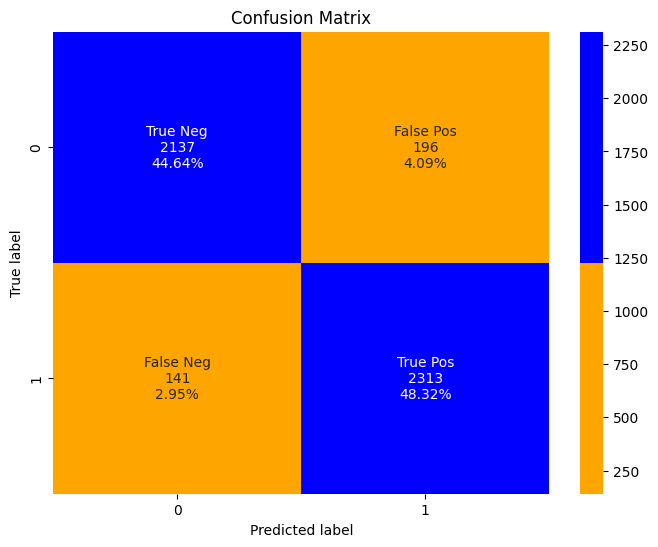

In [141]:
sm = SMOTEENN()
x_oversampled, y_oversampled = sm.fit_resample(x_train, y_train)
print(len(x_oversampled), len(y_oversampled))

model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_oversampled, y_oversampled)

rf_predict = model_rf.predict(x_oversampled)
model_score_rf = model_rf.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(model_rf, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, model_rf.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, model_rf.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_rf))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_oversampled, rf_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_oversampled, rf_predict)
tn_rfov, fp_rfov, fn_rfov, tp_rfov = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_rfov, fp_rfov, fn_rfov, tp_rfov ]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **Random Forest Classifier with Undersampling**

Validation Score (Mean): 75.45%
ROC AUC Score: 87.18%




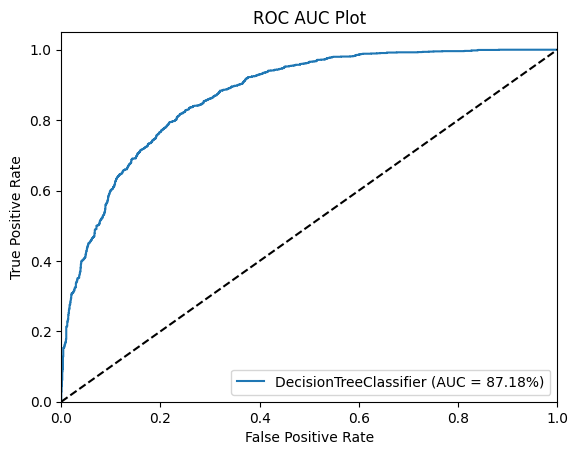





Model Score (Training Accuracy): 78.63%

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1495
           1       0.76      0.84      0.80      1495

    accuracy                           0.79      2990
   macro avg       0.79      0.79      0.79      2990
weighted avg       0.79      0.79      0.79      2990







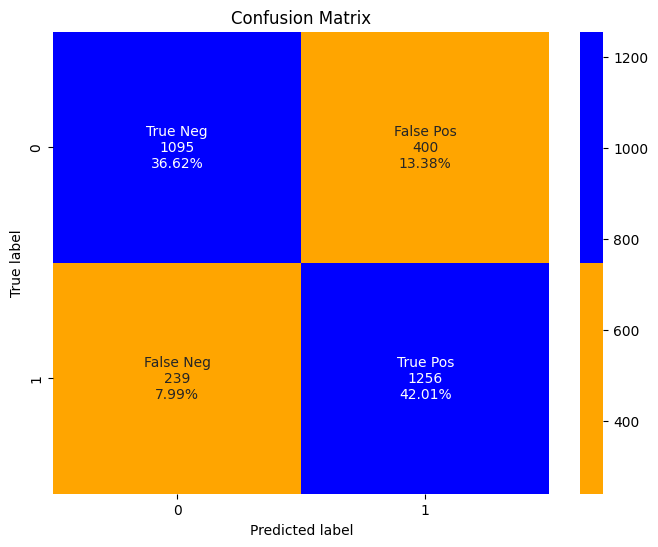

In [142]:
classifier_rf_under = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_rf_under.fit(x_undersampled, y_undersampled)

rfu_predict = classifier_rf_under.predict(x_undersampled)
model_score_r = classifier_rf_under.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(classifier_rf_under, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, classifier_rf_under.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, classifier_rf_under.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_undersampled, rfu_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_undersampled, rfu_predict)
tn_rfun, fp_rfun, fn_rfun, tp_rfun = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_rfun, fp_rfun, fn_rfun, tp_rfun]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **Random Forest Classifier with Imbalanced**

Validation Score (Mean): 79.81%
ROC AUC Score: 86.57%




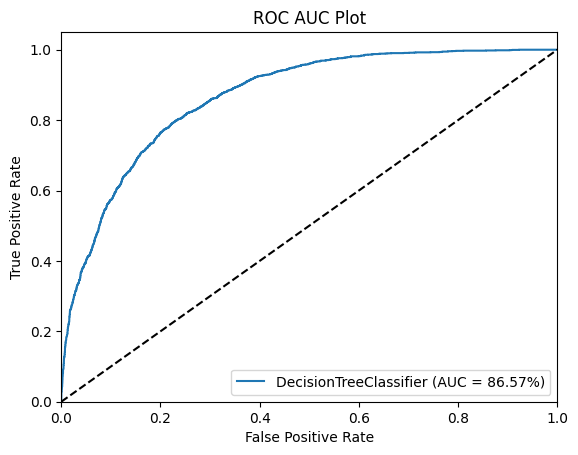





Model Score (Training Accuracy): 80.82%

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5163
           1       0.70      0.48      0.57      1869

    accuracy                           0.81      7032
   macro avg       0.77      0.70      0.72      7032
weighted avg       0.80      0.81      0.80      7032







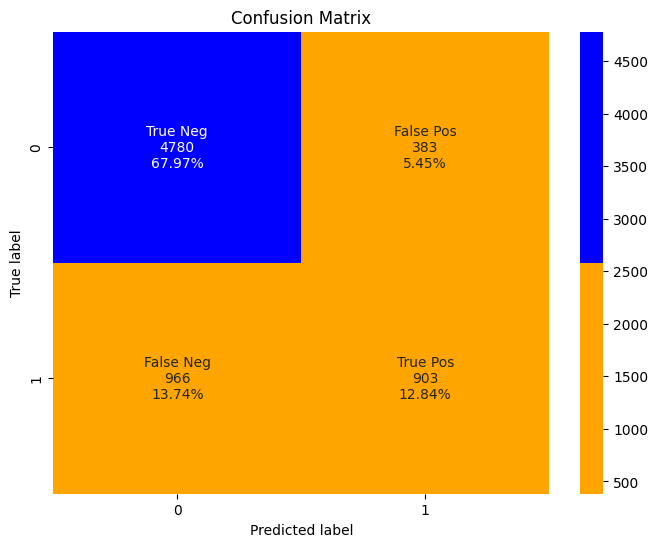

In [143]:

classifier_rf_imb = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_rf_imb.fit(x, y)


imb_predict = classifier_rf_imb.predict(x)
model_score_r = classifier_rf_imb.score(x, y)

# Validation Score
validation_score = cross_val_score(classifier_rf_imb, x, y, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y, classifier_rf_imb.predict_proba(x)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y, classifier_rf_imb.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_r))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y, imb_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y, imb_predict)
tn_rfim, fp_rfim, fn_rfim, tp_rfim = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_rfim, fp_rfim, fn_rfim, tp_rfim]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## **XG Boost Classifier**

In [117]:
from xgboost import XGBClassifier

### **XG Boost Classifier with Oversampling**

In [144]:
sm = SMOTEENN()
x_oversampled, y_oversampled = sm.fit_resample(x_train, y_train)
print(len(x_oversampled), len(y_oversampled))

4758 4758


Validation Score (Mean): 92.64%
ROC AUC Score: 98.67%




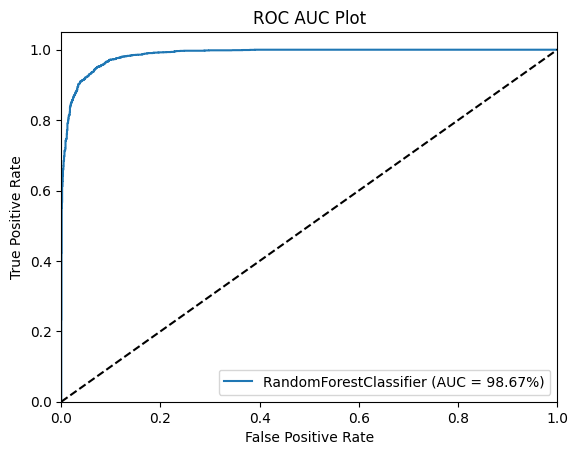





Model Score (Training Accuracy): 93.93%

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2343
           1       0.93      0.95      0.94      2415

    accuracy                           0.94      4758
   macro avg       0.94      0.94      0.94      4758
weighted avg       0.94      0.94      0.94      4758







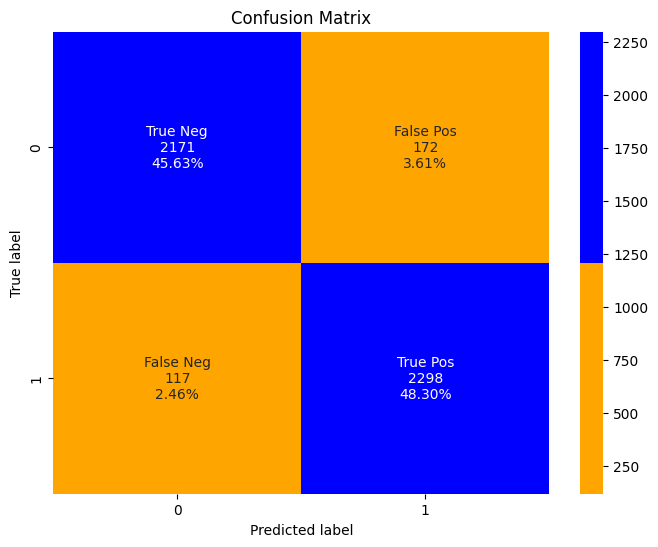

In [145]:

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
#model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_xgb.fit(x_oversampled, y_oversampled)

xgo_predict = classifier_xgb.predict(x_oversampled)
model_score_xg = classifier_xgb.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(classifier_xgb, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, classifier_xgb.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, classifier_xgb.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost Classifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_xg))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_oversampled, xgo_predict))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_oversampled, xgo_predict)
tn_xgov, fp_xgov, fn_xgov, tp_xgov = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_xgov, fp_xgov, fn_xgov, tp_xgov]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **XG Boost Classifier with Undersampling:**

Validation Score (Mean): 75.92%
ROC AUC Score: 88.05%




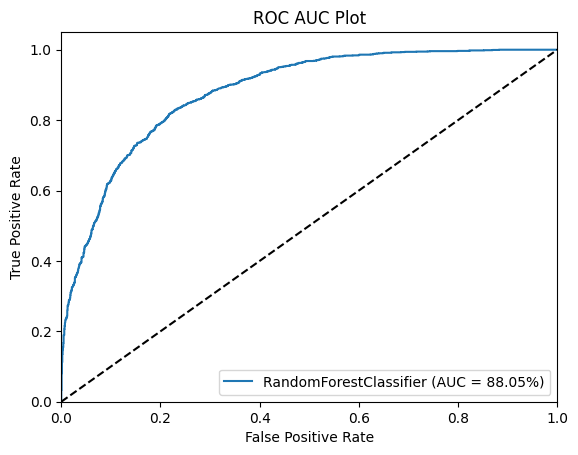





Model Score (Training Accuracy): 79.33%

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1495
           1       0.76      0.85      0.80      1495

    accuracy                           0.79      2990
   macro avg       0.80      0.79      0.79      2990
weighted avg       0.80      0.79      0.79      2990







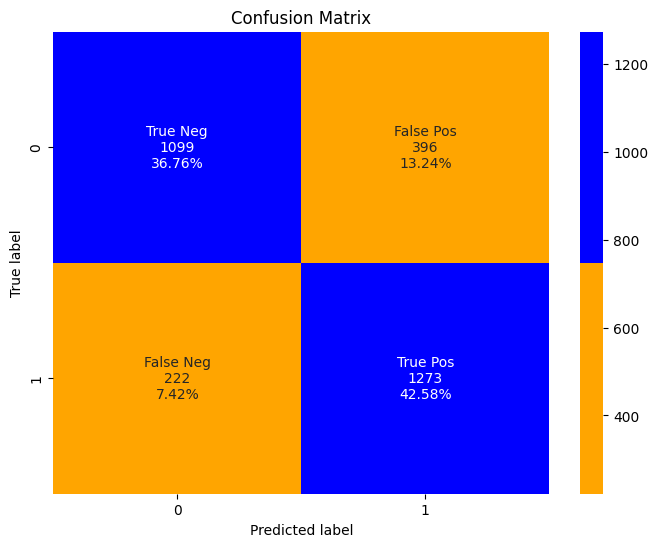

In [146]:
classifier_xgb_under = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
#model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_xgb_under.fit(x_undersampled, y_undersampled)

xgo_predict_under = classifier_xgb_under.predict(x_undersampled)
model_score_xg_under = classifier_xgb_under.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(classifier_xgb_under, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))



# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, classifier_xgb_under.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, classifier_xgb_under.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost Classifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_xg_under))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y_undersampled, xgo_predict_under))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y_undersampled, xgo_predict_under)
tn_xgun, fp_xgun, fn_xgun, tp_xgun = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_xgun, fp_xgun, fn_xgun, tp_xgun]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **XG Boost Classifier with Imbalanced data:**

Validation Score (Mean): 80.50%
ROC AUC Score: 86.78%




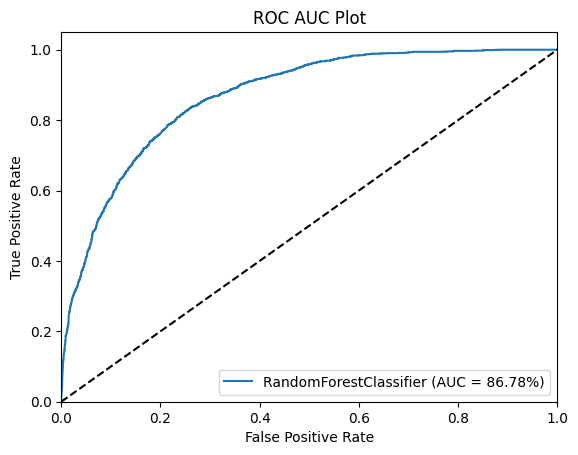





Model Score (Training Accuracy): 81.54%

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5163
           1       0.70      0.54      0.61      1869

    accuracy                           0.82      7032
   macro avg       0.77      0.73      0.74      7032
weighted avg       0.81      0.82      0.81      7032







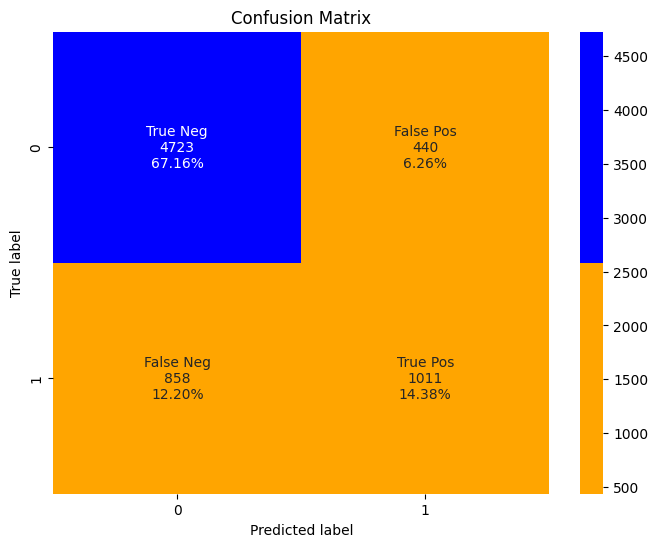

In [147]:
classifier_xgb_imb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
#model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
classifier_xgb_imb.fit(x, y)

xgo_predict_imb = classifier_xgb_imb.predict(x)
model_score_xg_imb = classifier_xgb_imb.score(x, y)

# Validation Score
validation_score = cross_val_score(classifier_xgb_imb, x, y, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))


# ROC AUC Score
roc_auc = roc_auc_score(y, classifier_xgb_imb.predict_proba(x)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

print()
print()

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y, classifier_xgb_imb.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost Classifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

print()
print()
print()
print()

print("Model Score (Training Accuracy): {:.2%}".format(model_score_xg_imb))
print()
print("Classification Report:")
print()
print(metrics.classification_report(y, xgo_predict_imb))

print()
print()
print()
print()


conf_matrix = metrics.confusion_matrix(y, xgo_predict_imb)
tn_xgim, fp_xgim, fn_xgim, tp_xgim = conf_matrix.ravel()
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [tn_xgim, fp_xgim, fn_xgim, tp_xgim]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Measures for Reducing Customer Churn & Revenue Increase**

*   3 types of customers should be targeted : SeniorCitizen, Living with a Partner, living all alone!
*   The number of SeniorCitizen customers are low but their lowerlimit of MonthlyCharges is higher than the other customers. Thus, SeniorCitizen customers are ready to pay top dollar but they need to catered with that level of service. For customers with a Partner as well as customers living alone, they prefer services with MonthlyCharges below 65.
*   Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the tenure of 1st 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as this period is the most critical and uncertain for the customers. They must lower the churn tenure of 40 - 50 months for these services!.
*   Once they build a solid pipeline of support services for customers, they need to push the usage of MultipleLines & Fiber Optic cables for the PhoneService & InternetService respectively. But the major hurdle for these 2 services is the starting point of 75+ in MonthlyCharges.
*   Thus, they need to create combinations of options provided for PhoneService & InternetService where average of these MonthlyCharges will be in the range of 100 - 120 :
    *   No MultipleLines + OpticFiber
    *    MultipleLines + DSL
     

*   This will increase the mean income from a user as it completely drops the option of choosing a combination of No MultipleLines + DSL whose mean MonthlyCharges is probably 60 - 70!
*   StreamingTV and StreamingMovies need to be made affordable as well as reducing it's churn tenure. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free PaymentMethod.
*   It needs to put an end to the Electronic check for payment purposes due to it's high churn and focus entirely on Bank Transfer (automatic) & Credit Card (automatic)! However, they will be challenged to reduce the median churn tenure of above 20 months for these 2 PaymentMethod which is double the churn tenure of Electronic check.
*   Lower limit of Electronic check is around 60 whereas that of Bank Transfer (automatic) & Credit Card (automatic) is around 20 in MonthlyCharges. PaperlessBilling is another expensive feature with a starting point of 60 whereas the other options are cheap starting at 20 in MonthlyCharges.
* Once the MonthlyCharges for any single service hits the 70 mark, customers become very conscious about their MonthlyCharges. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process!






# **Conclusion**

* This is a great dataset that gives an opportunity to peak into the real world business problem and can be dealt with the Data Science techniues.
* Insights gained from the EDA are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop fo improvement.
* SMOTE analysis is used for data balancing. Combinations of undersampling and oversampling can be employed as well. Undersampling was tried out for this problem but it landed the F1 Score (Churn) in the range of 60 - 70 %. There are other data balancing methods available as well.
* When it comes to model performance, feature creation by combining features was carried out however, they did not outperform the current models. Hyperparamter tuning & outlier detection could also bump up the F1 Score (Churn) & Cross Validation Score. Stack of models pipped the XGBClassifier & LGBMClassifier by a margin of 0.01 for F1 Score (Churn).





Validation Score (Mean): 91.54%
ROC AUC Score: 98.35%


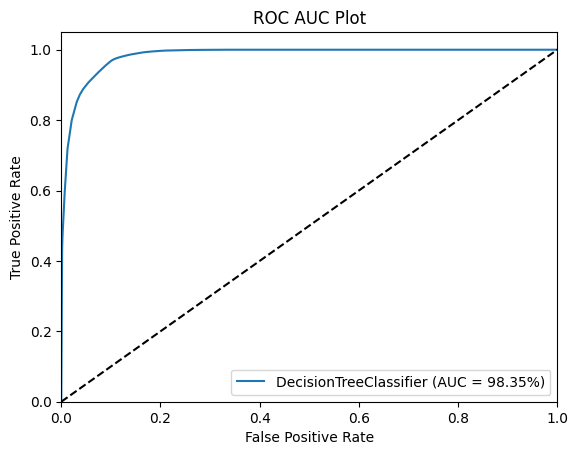

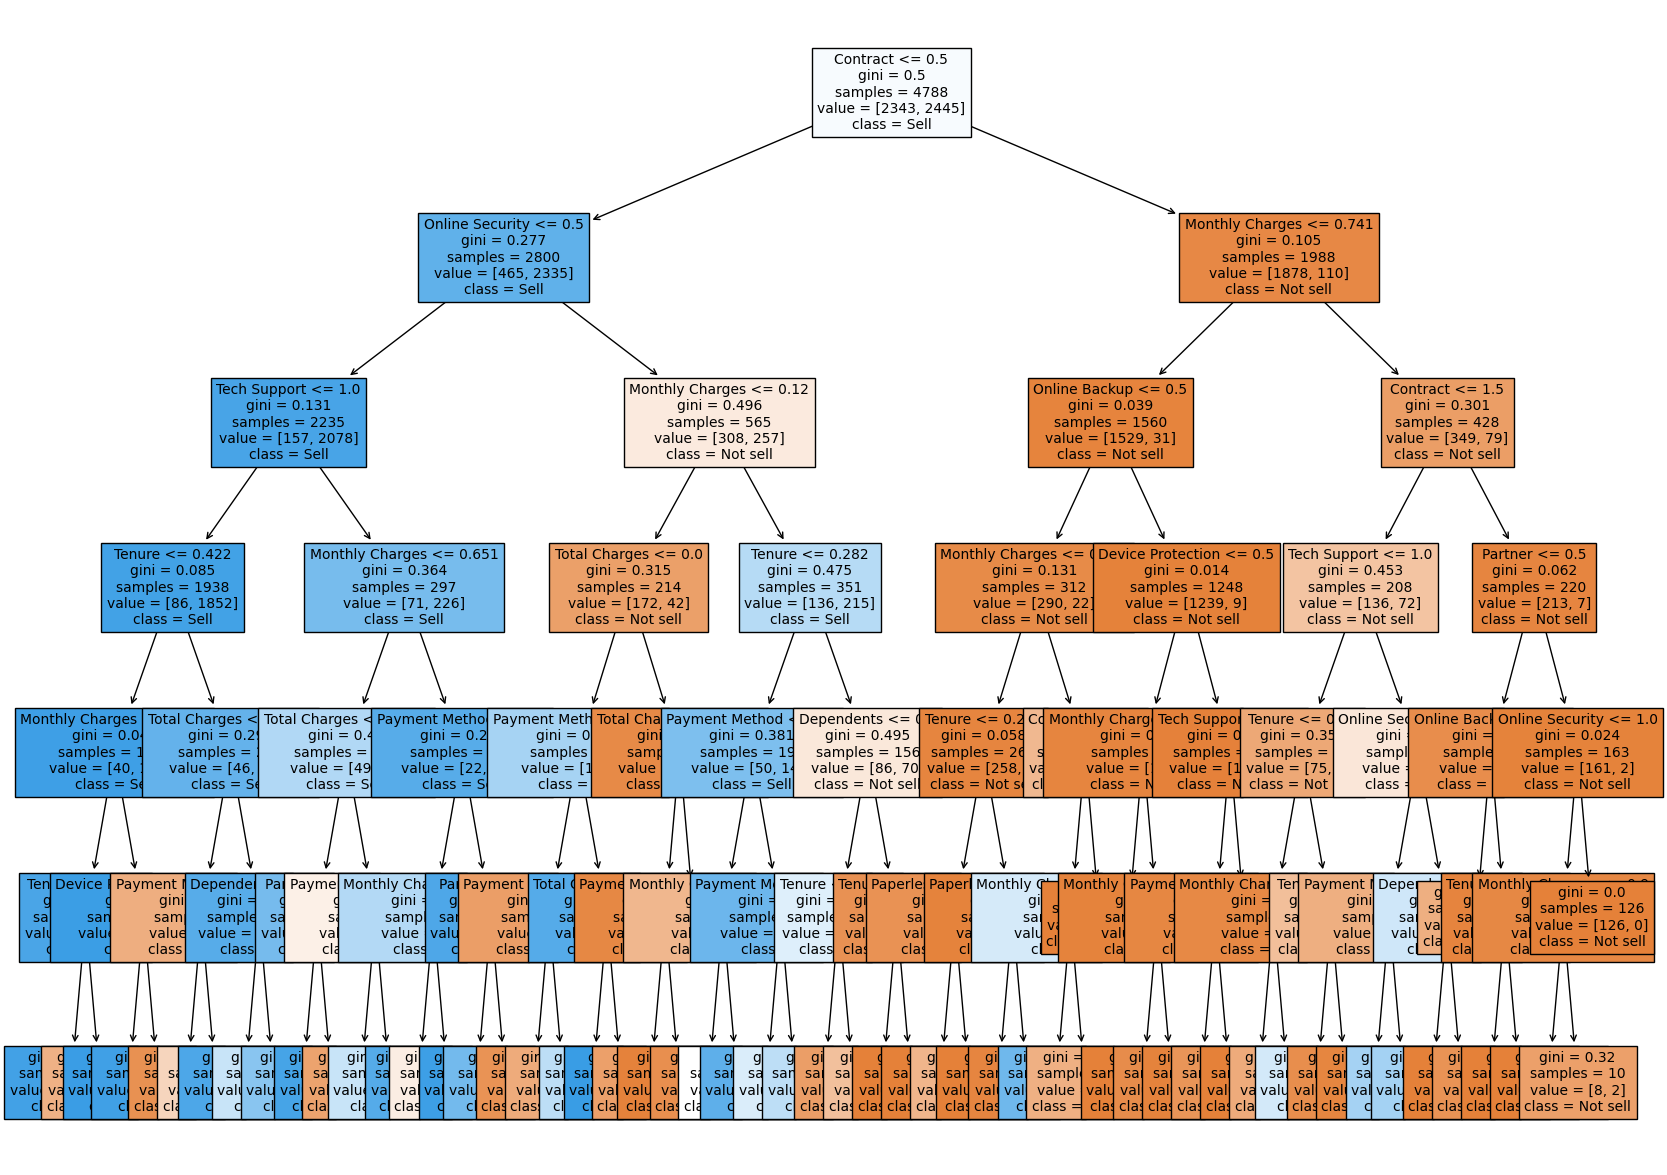


Model Score (Training Accuracy): 93.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2343
           1       0.91      0.97      0.94      2445

    accuracy                           0.93      4788
   macro avg       0.94      0.93      0.93      4788
weighted avg       0.94      0.93      0.93      4788



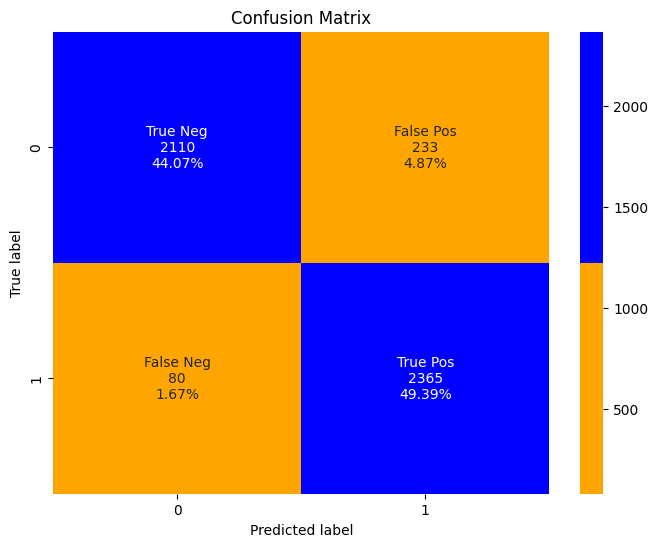

In [166]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

# Define and fit the model
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(x_oversampled, y_oversampled)

# Predictions and model evaluation
yr_predict = model_dt_smote.predict(x_oversampled)
model_score_r = model_dt_smote.score(x_oversampled, y_oversampled)

# Validation Score
validation_score = cross_val_score(model_dt_smote, x_oversampled, y_oversampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))

# ROC AUC Score
roc_auc = roc_auc_score(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_oversampled, model_dt_smote.predict_proba(x_oversampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(model_dt_smote, filled=True, feature_names=x_oversampled.columns, class_names=['Not sell', 'Sell'], fontsize=10)
plt.show()

# Model Score (Training Accuracy)
print("\nModel Score (Training Accuracy): {:.2%}".format(model_score_r))

# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_oversampled, yr_predict))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_oversampled, yr_predict)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Validation Score (Mean): 73.58%
ROC AUC Score: 87.00%


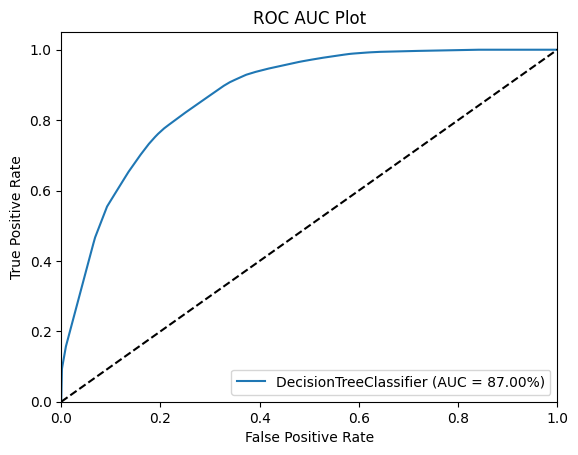

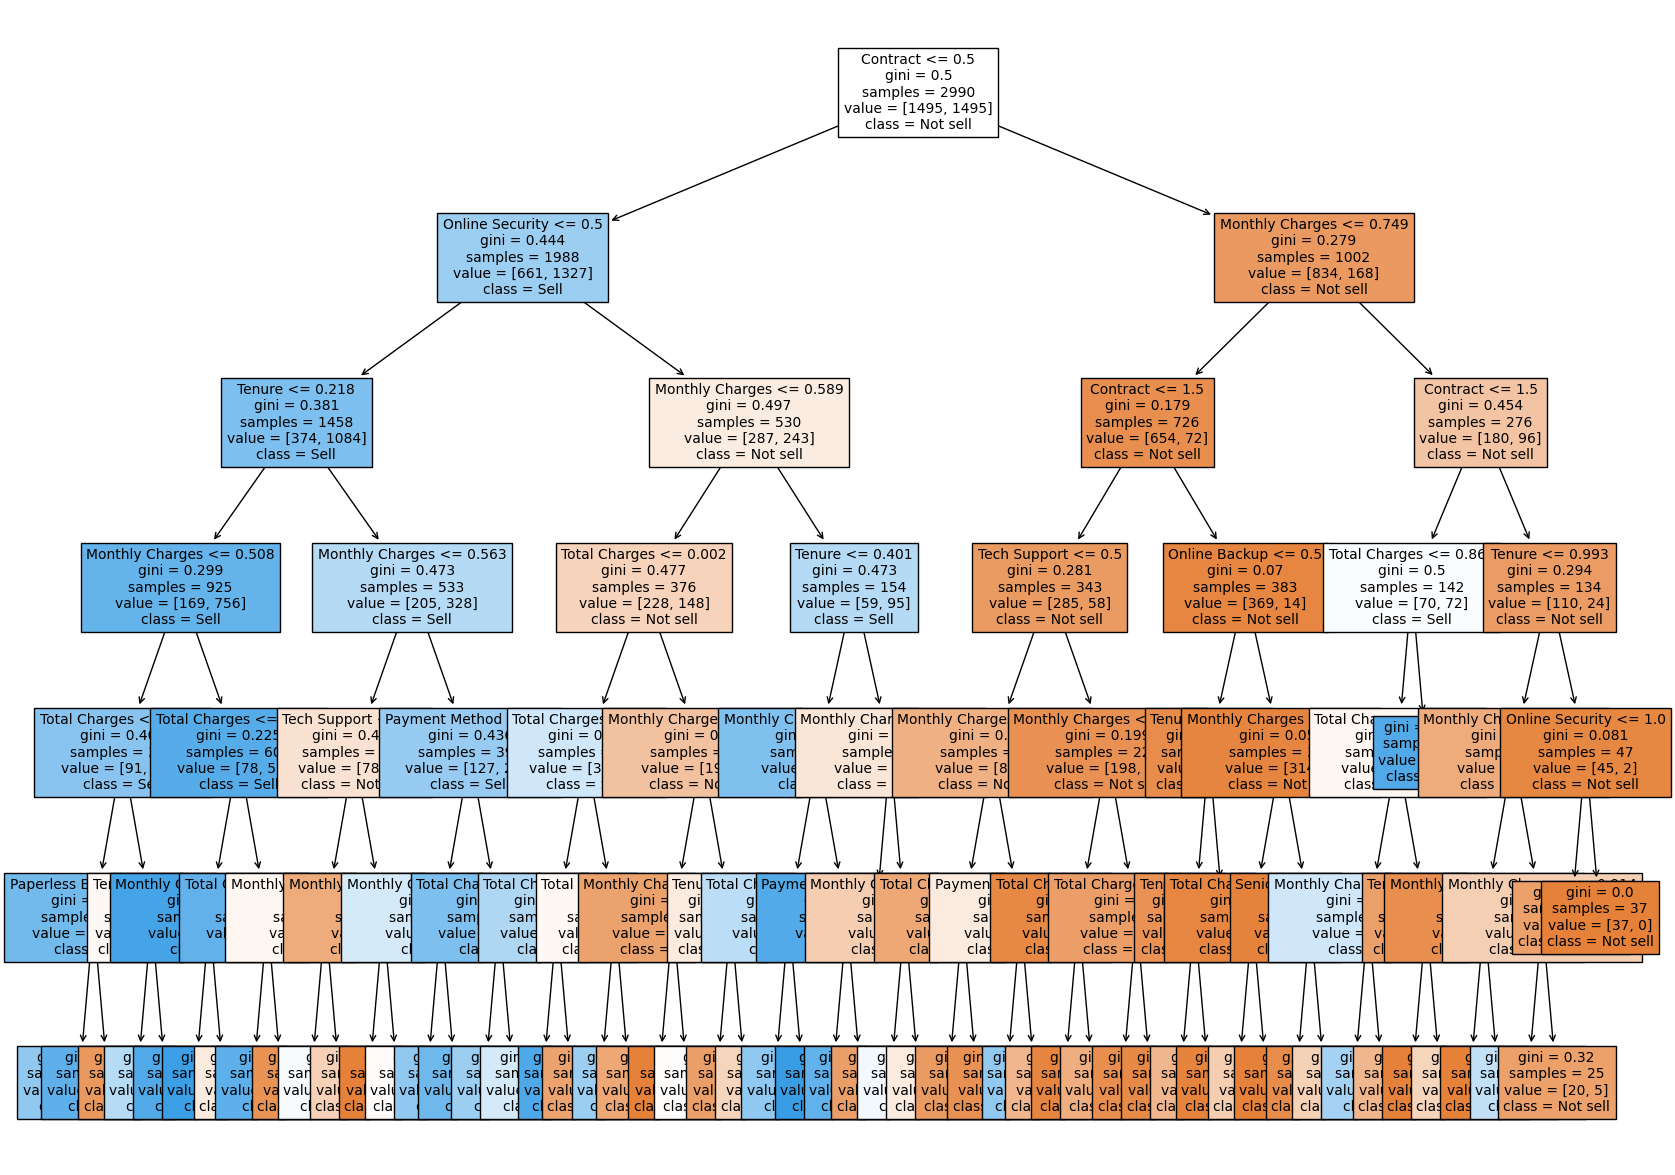


Model Score (Training Accuracy): 78.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1495
           1       0.77      0.82      0.79      1495

    accuracy                           0.79      2990
   macro avg       0.79      0.79      0.79      2990
weighted avg       0.79      0.79      0.79      2990



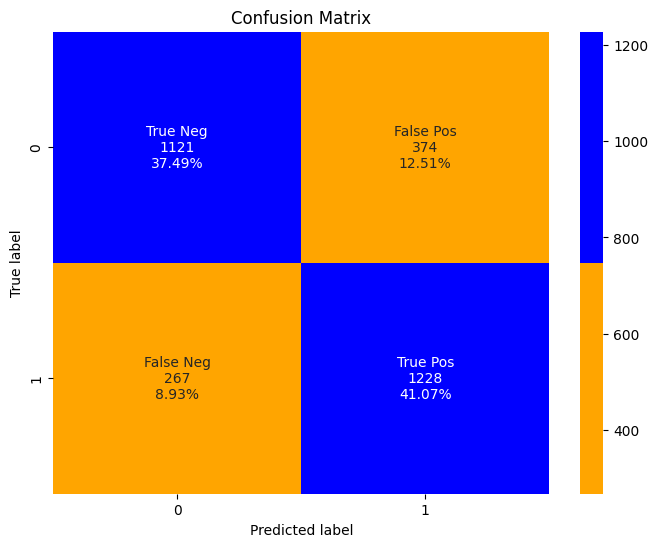

In [168]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

# Define and fit the model
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(x_undersampled, y_undersampled)

# Predictions and model evaluation
yr_predict_un = model_dt_smote.predict(x_undersampled)
model_score_r_un = model_dt_smote.score(x_undersampled, y_undersampled)

# Validation Score
validation_score = cross_val_score(model_dt_smote, x_undersampled, y_undersampled, cv=5)
print("Validation Score (Mean): {:.2%}".format(validation_score.mean()))

# ROC AUC Score
roc_auc = roc_auc_score(y_undersampled, model_dt_smote.predict_proba(x_undersampled)[:,1])
print("ROC AUC Score: {:.2%}".format(roc_auc))

# Plot ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_undersampled, model_dt_smote.predict_proba(x_undersampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (AUC = {:.2%})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(model_dt_smote, filled=True, feature_names=x_undersampled.columns, class_names=['Not sell', 'Sell'], fontsize=10)
plt.show()

# Model Score (Training Accuracy)
print("\nModel Score (Training Accuracy): {:.2%}".format(model_score_r_un))

# Classification Report
print("\nClassification Report:")
print(metrics.classification_report(y_undersampled, yr_predict_un))

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_undersampled, yr_predict_un)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]]
percentages = ['{:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, cmap=sns.color_palette(["#FFA500", "#0000FF"]), fmt='')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
